In [1]:
from sqlalchemy import create_engine, text
import pandas as pd
import numpy as np

db_conn = {
     "user": "root",
     "password": "Dhyoon96!",
     "host": "127.0.0.1",
     "database": "side_proj_FCO"
 }

db_engine = "mysql+pymysql://%s:%s@%s/%s" % (
    db_conn["user"],
    db_conn["password"],
    db_conn["host"],
    db_conn["database"]
)

engine = create_engine(db_engine, echo=True)

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

mpl.rc('font', family = 'Malgun Gothic') # 한글 설정 (맑은 고딕)
mpl.rc('axes', unicode_minus = False) # 음수 부호 깨지는거 설정

import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [3]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [4]:
df_query = 'SELECT * FROM match_user'
df1 = pd.read_sql(df_query, con = engine)

2024-12-19 19:37:25,032 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2024-12-19 19:37:25,032 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-12-19 19:37:25,032 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2024-12-19 19:37:25,032 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-12-19 19:37:25,032 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2024-12-19 19:37:25,032 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-12-19 19:37:25,049 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %(table_schema)s AND table_name = %(table_name)s
2024-12-19 19:37:25,050 INFO sqlalchemy.engine.Engine [generated in 0.00082s] {'table_schema': 'side_proj_fco', 'table_name': 'SELECT * FROM match_user'}
2024-12-19 19:37:25,053 INFO sqlalchemy.engine.Engine SELECT * FROM match_user
2024-12-19 19:37:25,054 INFO sqlalchemy.engine.Engine [raw sql] {}


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   match_id                          2838 non-null   object 
 1   user_ouid                         2838 non-null   object 
 2   user_nickname                     2838 non-null   object 
 3   match_result                      2838 non-null   object 
 4   match_possession                  2838 non-null   int64  
 5   match_avg_rating                  2838 non-null   float64
 6   match_total_dribble               2838 non-null   int64  
 7   match_total_pass_try              2838 non-null   int64  
 8   match_total_pass_suc              2838 non-null   int64  
 9   match_total_shoot                 2838 non-null   int64  
 10  match_total_shoot_eff             2838 non-null   int64  
 11  match_total_goal                  2838 non-null   int64  
 12  attack

In [6]:
df1.describe()

,match_possession,match_avg_rating,match_total_dribble,match_total_pass_try,match_total_pass_suc,match_total_shoot,match_total_shoot_eff,match_total_goal,attack_position_ratings,middle_position_ratings,...,match_total_pass_short_try,match_total_pass_short_suc,match_total_pass_long_try,match_total_pass_long_suc,match_total_pass_through_try,match_total_pass_through_suc,match_total_shoot_outpenalty_try,match_total_shoot_outpenalty_suc,match_total_shoot_inpenalty_try,match_total_shoot_inpenalty_suc
count,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,...,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000,2838.000000
mean,50.468992,3.851987,14.996829,20.675828,18.355532,2.132135,1.655743,0.943975,6.403510,6.695447,...,14.112403,13.297040,1.072234,0.565891,4.668428,3.958774,0.659972,0.182171,1.445384,0.744538
std,19.373122,0.498491,12.986435,17.890551,16.260571,3.153652,2.446370,1.554337,0.984776,1.151440,...,13.085537,12.455612,1.548669,1.043161,5.190926,4.578773,1.346135,0.490595,2.271262,1.337324
min,0.000000,2.788890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.130000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,3.455560,5.000000,7.000000,6.000000,0.000000,0.000000,0.000000,5.720000,6.000000,...,4.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,3.811110,12.000000,17.000000,15.000000,1.000000,1.000000,0.000000,6.100000,6.200000,...,11.000000,10.000000,1.000000,0.000000,3.000000,3.000000,0.000000,0.000000,1.000000,0.000000
75%,59.000000,4.183330,22.000000,30.000000,26.000000,3.000000,2.000000,2.000000,7.000000,7.300000,...,21.000000,20.000000,2.000000,1.000000,7.000000,6.000000,1.000000,0.000000,2.000000,1.000000
max,100.000000,6.644440,103.000000,131.000000,120.000000,32.000000,25.000000,18.000000,10.000000,10.000000,...,102.000000,94.000000,16.000000,11.000000,60.000000,49.000000,21.000000,6.000000,27.000000,17.000000


In [7]:
df1['match_result'].value_counts()

match_result
승    1507
패    1331
Name: count, dtype: int64

---

# 변수간 상관관계 및 VIF 확인

### 변수간 상관관계 분석 

In [8]:
df1_temp = df1.drop(columns = ['match_id', 'user_ouid', 'user_nickname', 'match_result'])

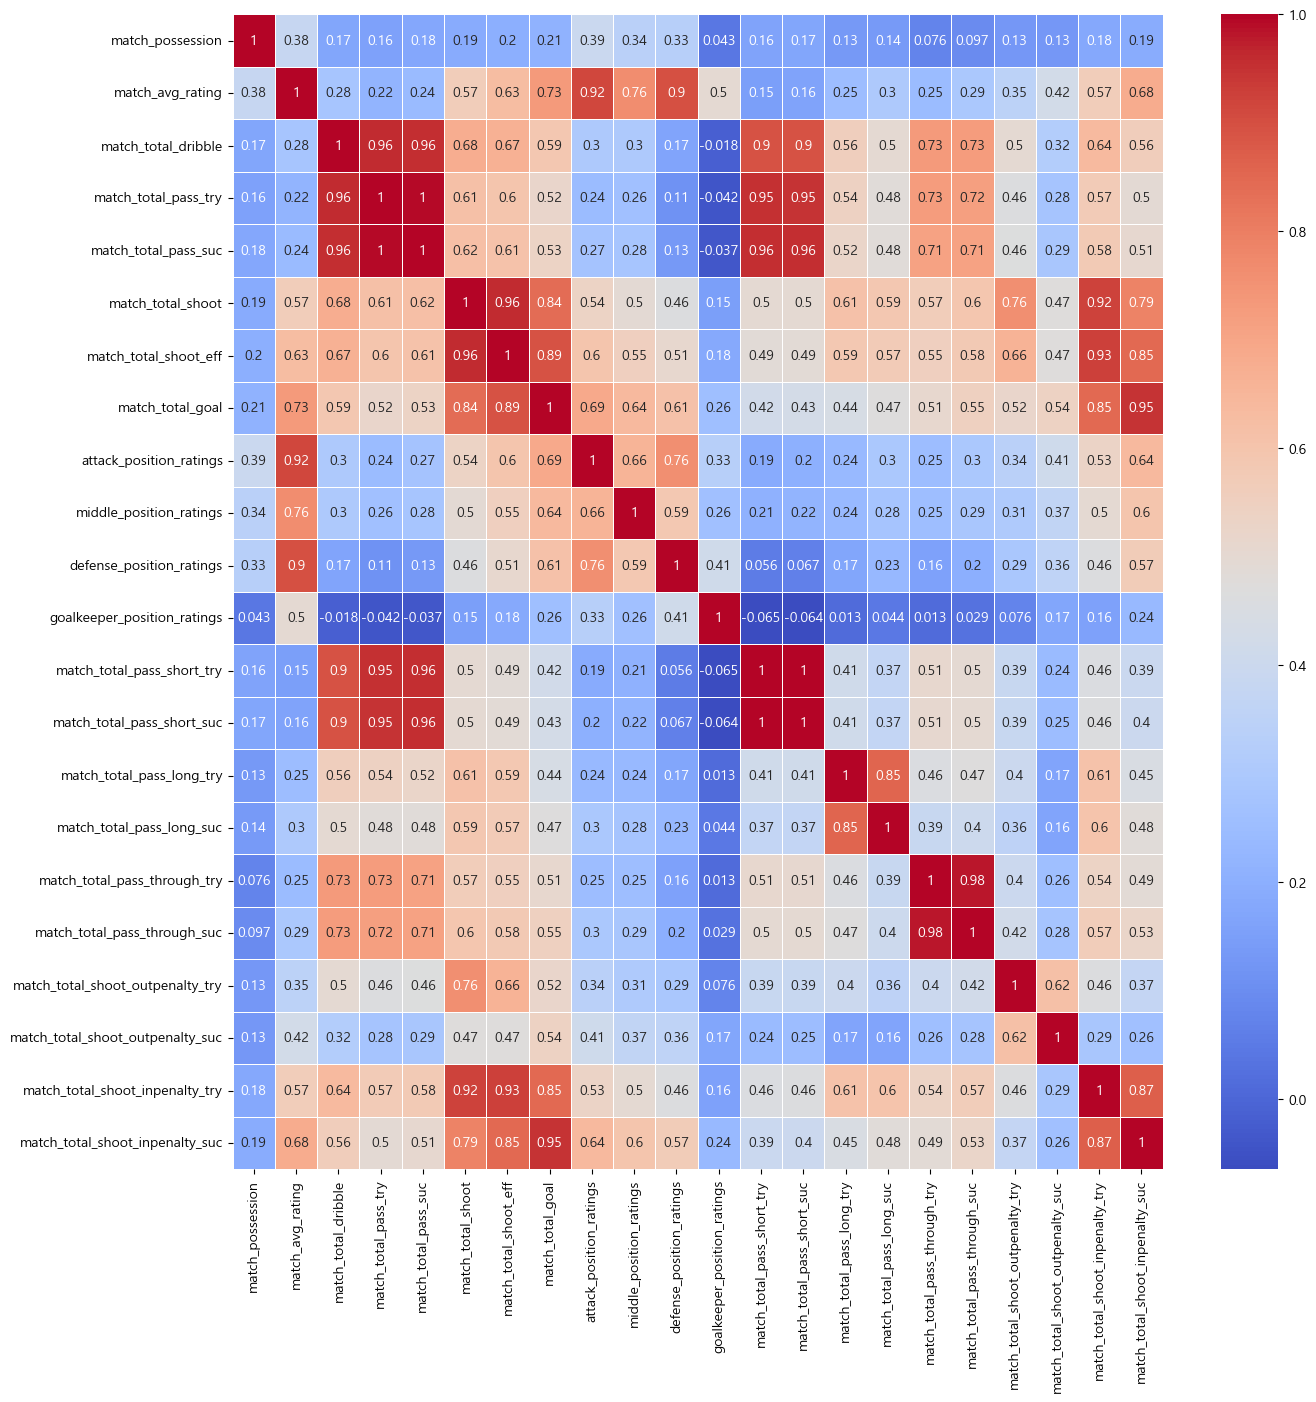

In [9]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(df1_temp.corr(), annot = True, linewidths = .5, cmap = 'coolwarm')
plt.show()

In [10]:
threshold = 0.9
corr_matrix = df1_temp.corr()

strong_corr_pairs = (
    corr_matrix
    .where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))    
    .stack()    
    .reset_index()  
)
strong_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
strong_corr_pairs = strong_corr_pairs[strong_corr_pairs['Correlation'] > threshold]

print(strong_corr_pairs)

                       Variable 1                       Variable 2  \
27               match_avg_rating          attack_position_ratings   
41            match_total_dribble             match_total_pass_try   
42            match_total_dribble             match_total_pass_suc   
60           match_total_pass_try             match_total_pass_suc   
68           match_total_pass_try       match_total_pass_short_try   
69           match_total_pass_try       match_total_pass_short_suc   
85           match_total_pass_suc       match_total_pass_short_try   
86           match_total_pass_suc       match_total_pass_short_suc   
95              match_total_shoot            match_total_shoot_eff   
109             match_total_shoot  match_total_shoot_inpenalty_try   
124         match_total_shoot_eff  match_total_shoot_inpenalty_try   
139              match_total_goal  match_total_shoot_inpenalty_suc   
186    match_total_pass_short_try       match_total_pass_short_suc   
216  match_total_pas

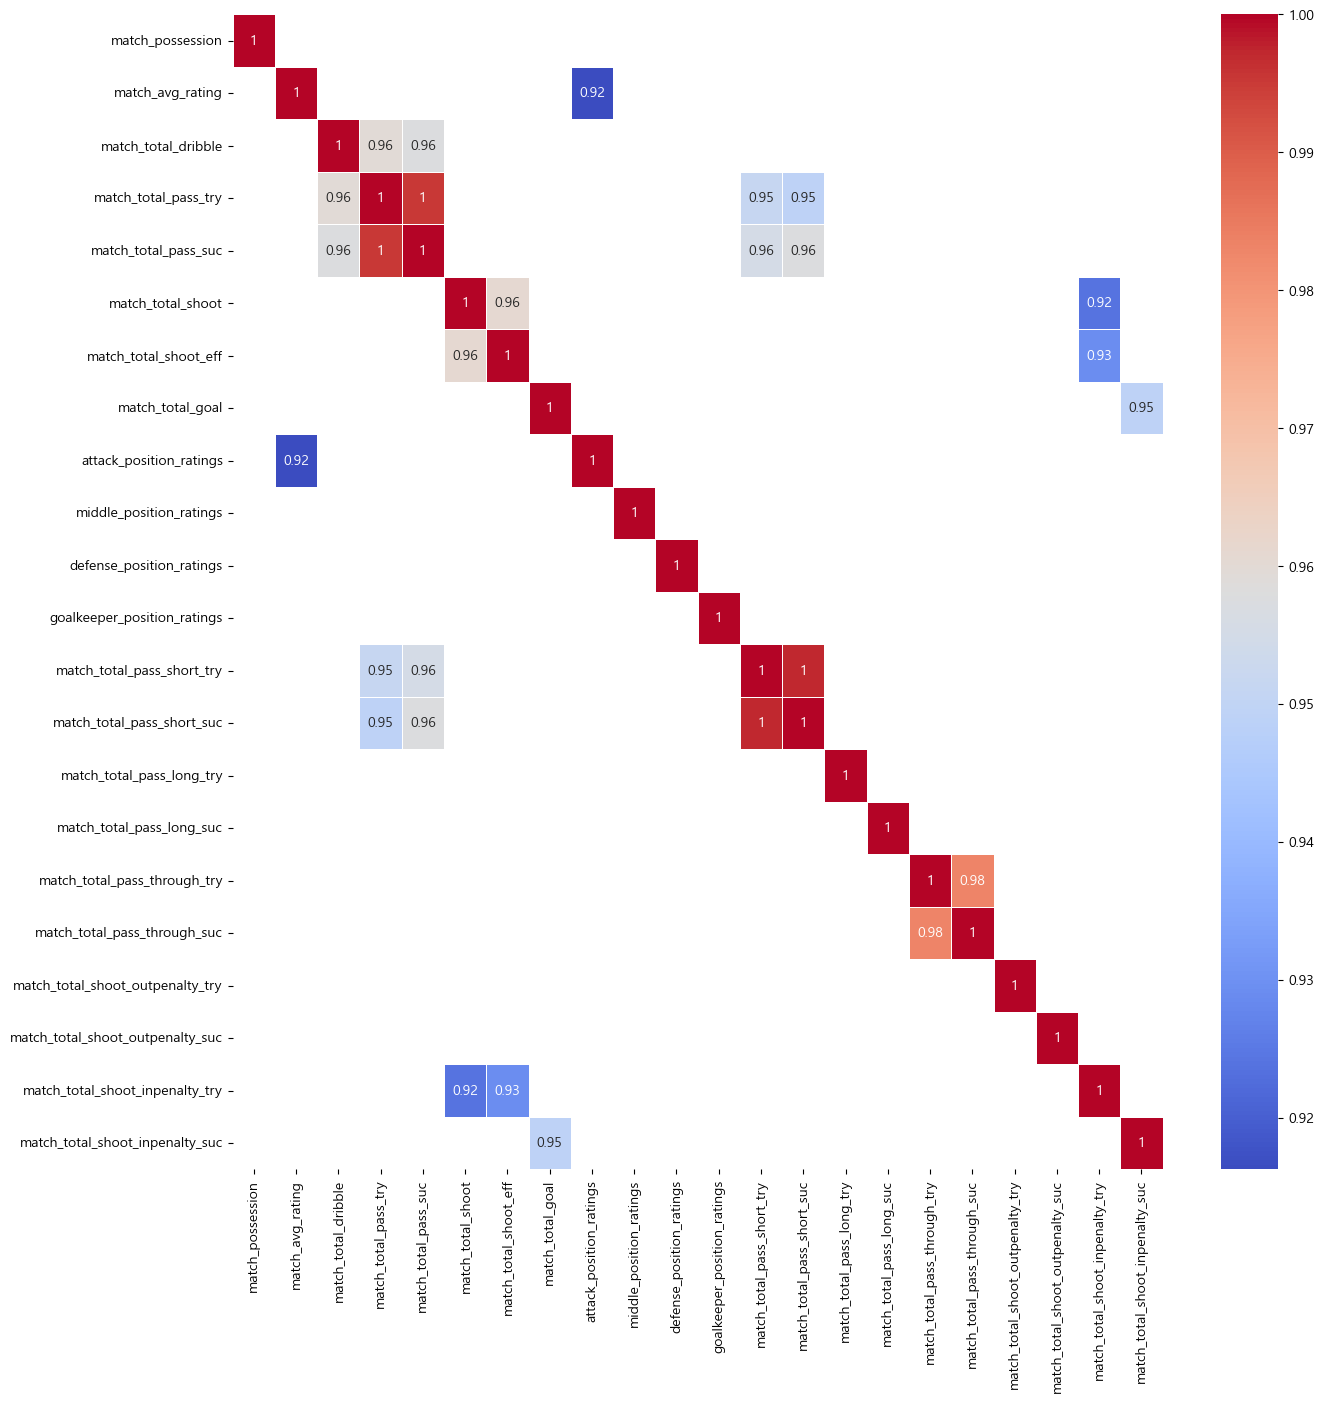

In [11]:
mask = np.abs(corr_matrix) <= threshold  

fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_matrix, mask = mask, annot = True, linewidths = 0.5, cmap = 'coolwarm', ax = ax)
plt.show()

### 변수 제거 후 상관계수 및 VIF 확인

In [12]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Feature Removal Based on VIF Threshold
def calculate_vif_(X, thresh = 10):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped = True
    
    while dropped:
        dropped = False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print(f"Dropping '{X[cols[variables]].columns[maxloc]}' at index {maxloc}")
            variables = np.delete(variables, maxloc)
            dropped = True

    if len(variables) == 0:
        print("All variables were removed. No remaining variables.")
        return pd.DataFrame() 

    print("Remaining variables:")
    print(X.columns[variables])
    return X[cols[variables]]

df2_temp = calculate_vif_(df1_temp)

# df2_temp = df1_temp.drop(columns = ['match_avg_rating', 
#                           'match_total_dribble', 'match_total_pass_try', 'match_total_pass_suc',
#                           'match_total_shoot', 'match_total_shoot_eff', 
#                           'match_total_pass_short_suc', 'match_total_pass_through_suc', 'match_total_pass_long_suc', 
#                           'match_total_shoot_outpenalty_suc', 'match_total_shoot_inpenalty_suc']
#                            + position_ratings_col)

Dropping 'match_avg_rating' at index 1
Dropping 'match_total_pass_suc' at index 3
Dropping 'match_total_shoot' at index 3
Dropping 'match_total_pass_short_try' at index 9
Dropping 'match_total_pass_try' at index 2
Dropping 'match_total_goal' at index 3
Dropping 'defense_position_ratings' at index 5
Dropping 'attack_position_ratings' at index 3
Dropping 'match_total_pass_through_try' at index 8
Dropping 'middle_position_ratings' at index 3
Dropping 'match_total_dribble' at index 1
Dropping 'match_total_shoot_eff' at index 1
Remaining variables:
Index(['match_possession', 'goalkeeper_position_ratings',
       'match_total_pass_short_suc', 'match_total_pass_long_try',
       'match_total_pass_long_suc', 'match_total_pass_through_suc',
       'match_total_shoot_outpenalty_try', 'match_total_shoot_outpenalty_suc',
       'match_total_shoot_inpenalty_try', 'match_total_shoot_inpenalty_suc'],
      dtype='object')


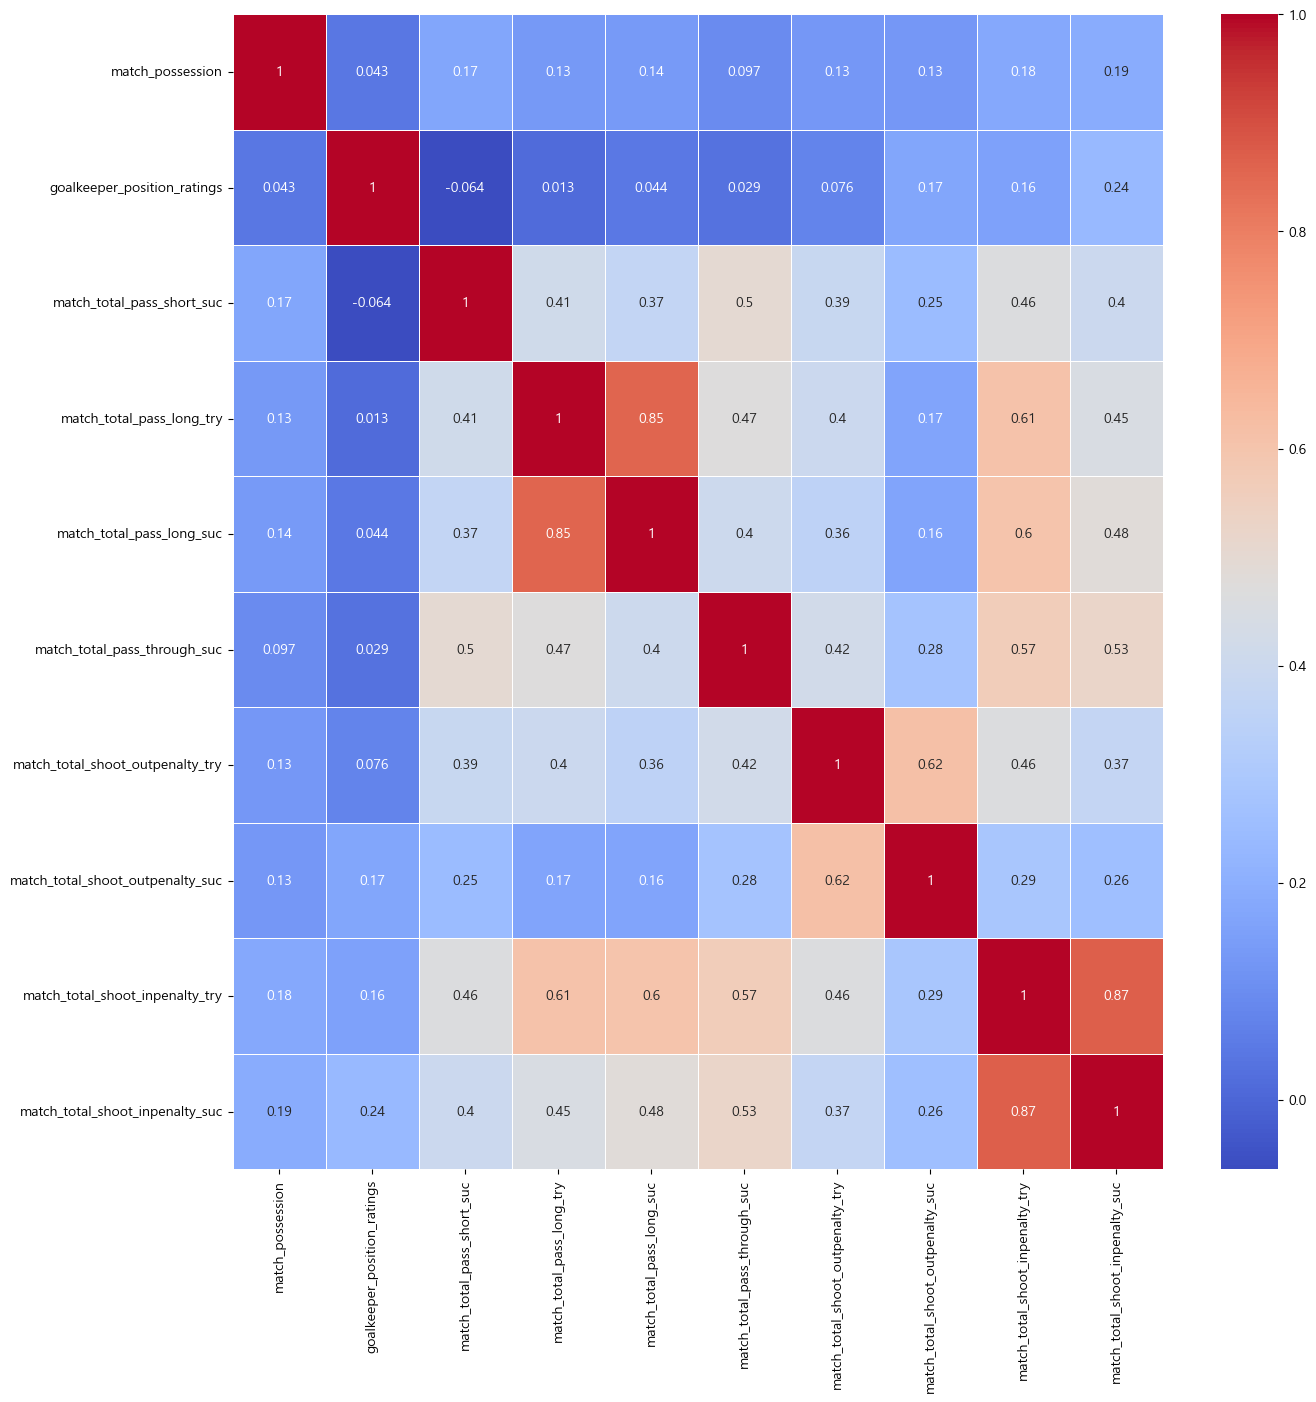

In [13]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(df2_temp.corr(), annot = True, linewidths = .5, cmap = 'coolwarm')
plt.show()

In [14]:
threshold = 0.7
corr_matrix = df2_temp.corr()
strong_corr_pairs = (
    corr_matrix
    .where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))  
    .stack()   
    .reset_index()    
)
strong_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
strong_corr_pairs = strong_corr_pairs[strong_corr_pairs['Correlation'] > threshold]

print(strong_corr_pairs)

                         Variable 1                       Variable 2  \
24        match_total_pass_long_try        match_total_pass_long_suc   
44  match_total_shoot_inpenalty_try  match_total_shoot_inpenalty_suc   

    Correlation  
24     0.854859  
44     0.869187  


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 출력 함수
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Variable"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    
    return vif

vif_data = calculate_vif(df2_temp)
vif_data

,Variable,VIF
0,match_possession,7.034584
1,goalkeeper_position_ratings,6.879765
2,match_total_pass_short_suc,3.141320
3,match_total_pass_long_try,6.446252
4,match_total_pass_long_suc,5.110694
5,match_total_pass_through_suc,3.051974
6,match_total_shoot_outpenalty_try,2.526497
7,match_total_shoot_outpenalty_suc,1.886712
8,match_total_shoot_inpenalty_try,8.039607
9,match_total_shoot_inpenalty_suc,5.792604


---

---

In [16]:
basic_col = ['match_possession', 
             'match_avg_rating', 
             'match_total_dribble', 
             'match_total_goal', 
             'match_total_shoot', 
             'match_total_pass_suc']

position_ratings_col = ['attack_position_ratings', 
                        'middle_position_ratings', 
                        'defense_position_ratings', 
                        'goalkeeper_position_ratings']

pass_col = ['match_total_pass_try', 
            'match_total_pass_suc',    
            'match_total_pass_short_try',
            'match_total_pass_short_suc', 
            'match_total_pass_long_try',
            'match_total_pass_long_suc', 
            'match_total_pass_through_try', 
            'match_total_pass_through_suc']

shoot_col = ['match_total_shoot', 
             'match_total_shoot_eff', 
             'match_total_shoot_outpenalty_try', 
             'match_total_shoot_outpenalty_suc', 
             'match_total_shoot_inpenalty_try', 
             'match_total_shoot_inpenalty_suc']

In [17]:
df3 = df1.copy()

df_win_query = "SELECT * FROM match_user WHERE match_result = '승'"
df3_win = pd.read_sql(df_win_query, con = engine)

df_lose_query = "SELECT * FROM match_user WHERE match_result = '패'"
df3_lose = pd.read_sql(df_lose_query, con = engine)

2024-12-19 19:37:27,899 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %(table_schema)s AND table_name = %(table_name)s
2024-12-19 19:37:27,899 INFO sqlalchemy.engine.Engine [cached since 2.865s ago] {'table_schema': 'side_proj_fco', 'table_name': "SELECT * FROM match_user WHERE match_result = '승'"}
2024-12-19 19:37:27,916 INFO sqlalchemy.engine.Engine SELECT * FROM match_user WHERE match_result = '승'
2024-12-19 19:37:27,916 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-12-19 19:37:27,976 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %(table_schema)s AND table_name = %(table_name)s
2024-12-19 19:37:27,976 INFO sqlalchemy.engine.Engine [cached since 2.928s ago] {'table_schema': 'side_proj_fco', 'table_name': "SELECT * FROM match_user WHERE match_result = '패'"}
2024-12-19 19:37:27,976 INFO sqlalchemy.engine.Engine SELECT * FROM match_user WHERE match_result = '패'
2024-12-19 19:37:27,9

In [18]:
df3_win

,match_id,user_ouid,user_nickname,match_result,match_possession,match_avg_rating,match_total_dribble,match_total_pass_try,match_total_pass_suc,match_total_shoot,...,match_total_pass_short_try,match_total_pass_short_suc,match_total_pass_long_try,match_total_pass_long_suc,match_total_pass_through_try,match_total_pass_through_suc,match_total_shoot_outpenalty_try,match_total_shoot_outpenalty_suc,match_total_shoot_inpenalty_try,match_total_shoot_inpenalty_suc
0,67418a50fcfb86525b068dc9,c5bd2d238afff4775b5e6bc5c928e31c,SaddIerS3,승,70,4.08333,19,19,17,4,...,12,12,1,0,6,5,2,1,2,0
1,67418a525b7f6b04d21d13d4,a49aaacc626c90bca37e175eb31ec288,A헤가오,승,59,4.17222,17,32,28,4,...,26,23,0,0,6,5,2,1,1,1
2,67418a58060e19029147892c,0db87e3296072311b38a1c19fc243939,LanderSSG,승,53,4.14444,23,32,29,1,...,24,23,2,0,6,6,0,0,1,1
3,67418a5b49725df11f881dad,48d376ea55efee991a7155369a1fa951,호날두lol,승,48,4.45556,32,44,44,7,...,40,40,1,1,2,2,3,1,4,2
4,67418a6ac076266384b39cb0,25773019db5c3fb18d2f71ecfd353a4c,LA애플,승,54,4.10556,17,20,16,1,...,12,12,4,1,4,3,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1502,6763c3d05607d963bf647623,8303af29c024663b63a8fcf174bcc599,120502ljj,승,58,3.65556,5,5,5,2,...,5,5,0,0,0,0,0,0,2,0
1503,6763c3f5abdcd0e3a3a83cdc,5e3e24b6c98195e9a5755f383d47ddaf,부산거미,승,69,4.24444,13,17,16,1,...,13,13,0,0,3,3,1,1,0,0
1504,6763c3fdfd61472df05a1055,46d3b4498e59e76c5049b1fe7481d67e,타겟형스트라이커,승,7,3.66667,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1505,6763c40bbb39e78c6b3fceef,30734e68d7f64a598cc22c6988781394,하핳핳핳핳핳하,승,90,5.02778,8,16,15,1,...,14,14,0,0,1,0,0,0,1,1


In [19]:
df3_lose

,match_id,user_ouid,user_nickname,match_result,match_possession,match_avg_rating,match_total_dribble,match_total_pass_try,match_total_pass_suc,match_total_shoot,...,match_total_pass_short_try,match_total_pass_short_suc,match_total_pass_long_try,match_total_pass_long_suc,match_total_pass_through_try,match_total_pass_through_suc,match_total_shoot_outpenalty_try,match_total_shoot_outpenalty_suc,match_total_shoot_inpenalty_try,match_total_shoot_inpenalty_suc
0,67418a563909e504f56f8222,623d56892e95056759904c52507a366a,대북중1짱,패,47,3.76111,21,25,23,0,...,12,12,0,0,13,11,0,0,0,0
1,67418a5b49725df11f881dad,aa233a8979530bf9c68c70887af62fe5,헛똑똑이,패,52,3.23333,18,30,25,0,...,22,21,2,0,5,4,0,0,0,0
2,67418a5e50df1b077eba40ff,000b9119e3cc3c8889df346602ca0de8,후어유,패,17,4.10556,2,1,1,0,...,1,1,0,0,0,0,0,0,0,0
3,67418a6026241724d12a3e7e,382e7980d4c625c9d30e4be9cf50aecf,불멸의발주먹,패,43,3.47222,24,45,40,3,...,32,31,2,2,5,3,2,0,1,0
4,67418a64f9e8d30e30e3cc4a,dcd1aae1a87b11c630ba8cfa281c8352,락견,패,61,3.80000,21,28,27,4,...,23,22,1,1,4,4,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,6763c3d05607d963bf647623,69335e273ce00ef77e2aae4bff88edf9,어획,패,27,3.89444,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1327,6763c3e09e87e24337eb0b5a,6f7cc62aca64d952232a5ace61ac811c,커티스조슨,패,56,3.68889,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1328,6763c3fdfd61472df05a1055,1d4c352994a719a7e6df661523616c11,강력한즐라탄,패,100,3.88333,2,3,2,0,...,1,1,0,0,2,1,0,0,0,0
1329,6763c40bbb39e78c6b3fceef,15c5a882df94f9f3e5f6471004c7a92c,닭다리도둑은없다,패,10,3.43889,1,2,1,0,...,1,1,0,0,0,0,0,0,0,0


---

## Stat별 HIST

In [20]:
def col_hist_all(df, col_name) : 
    fig, ax = plt.subplots(ncols = len(col_name), 
                           figsize = (3.5 * len(col_name), 6))
                           
    if len(col_name) == 1:
        ax = [ax]

    ax[0].set_ylabel('count')

    for idx, col in enumerate(col_name):
        bins = 15
        
        sns.histplot(df[col].values, color = 'green', kde = True, ax = ax[idx], 
                     bins = bins, alpha = 0.6)   
        
        ax[idx].set_title(col_name[idx])
        ax[idx].set_xlim(0, max(7, max(df[col])))

    plt.tight_layout()
    plt.show()

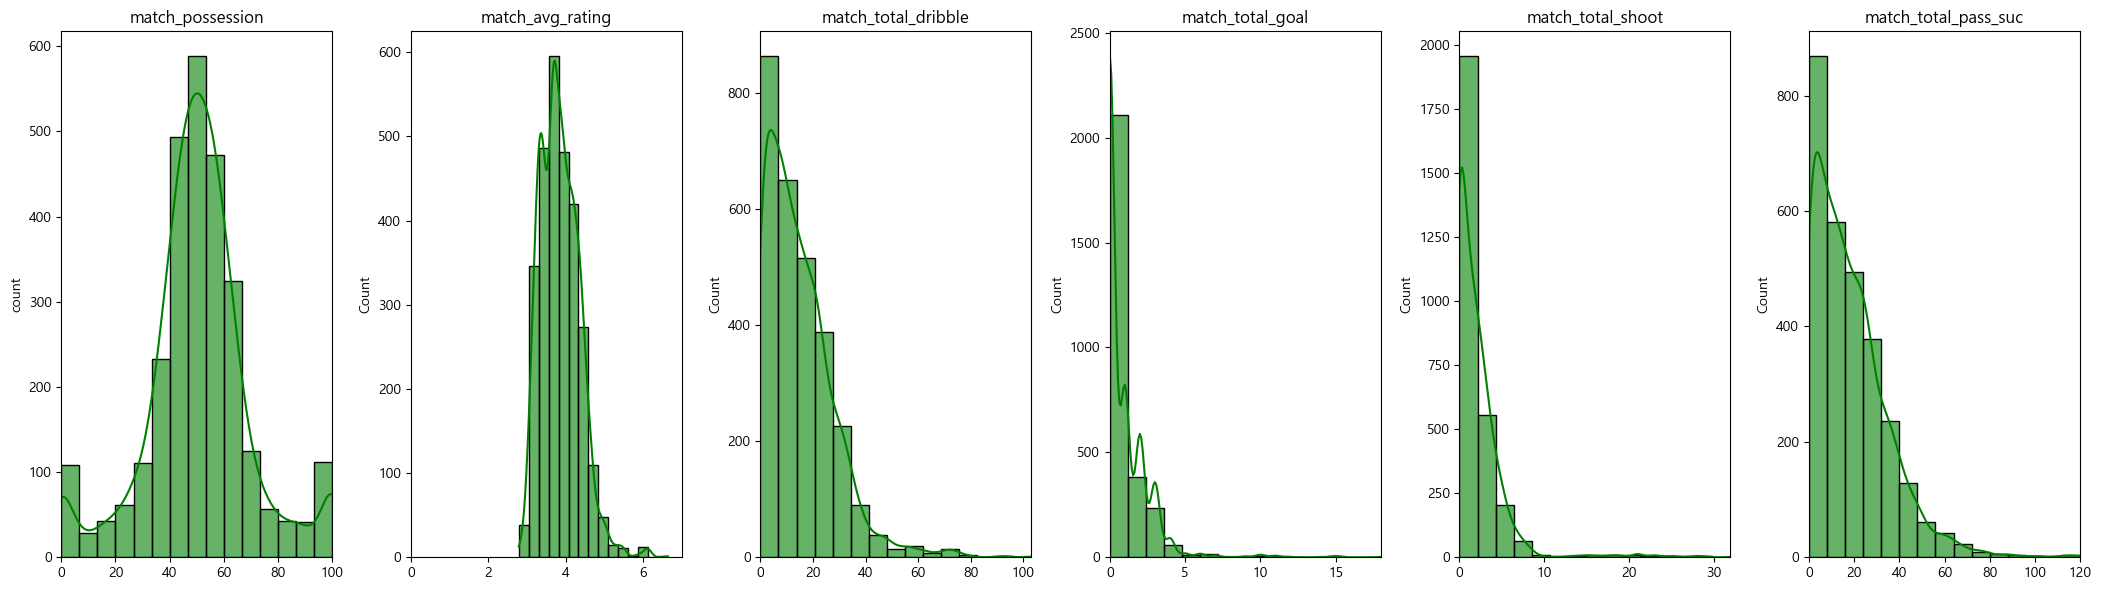

In [21]:
col_hist_all(df3, basic_col)

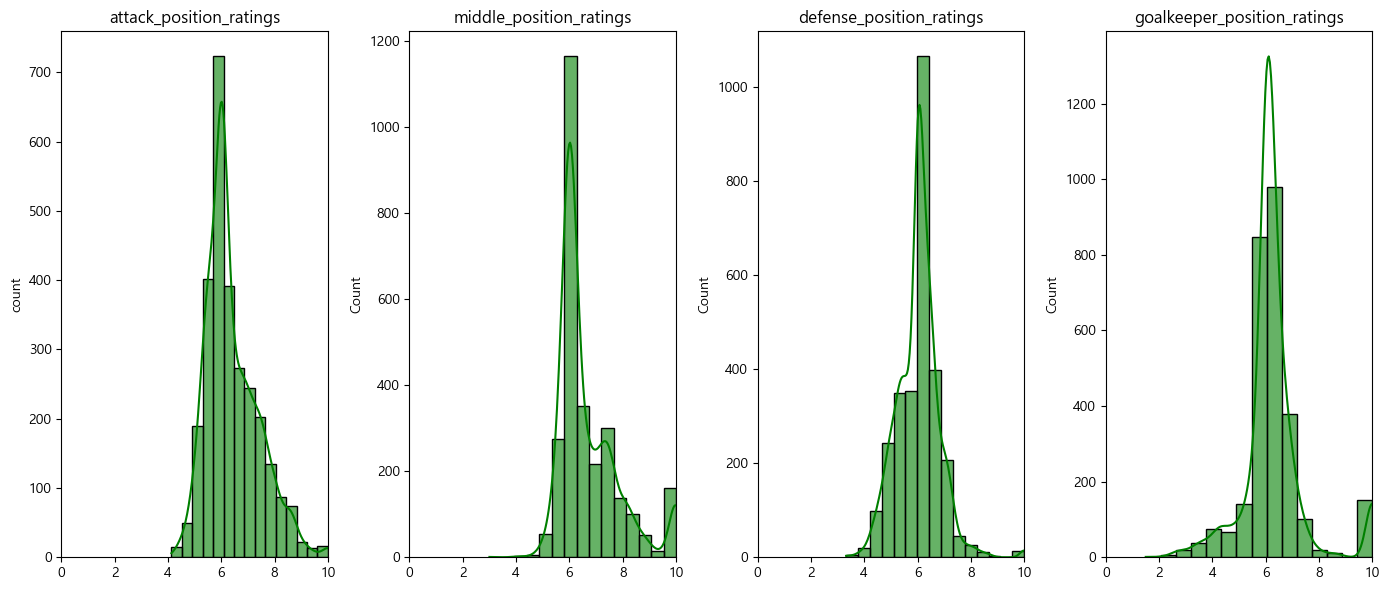

In [22]:
col_hist_all(df3, position_ratings_col)

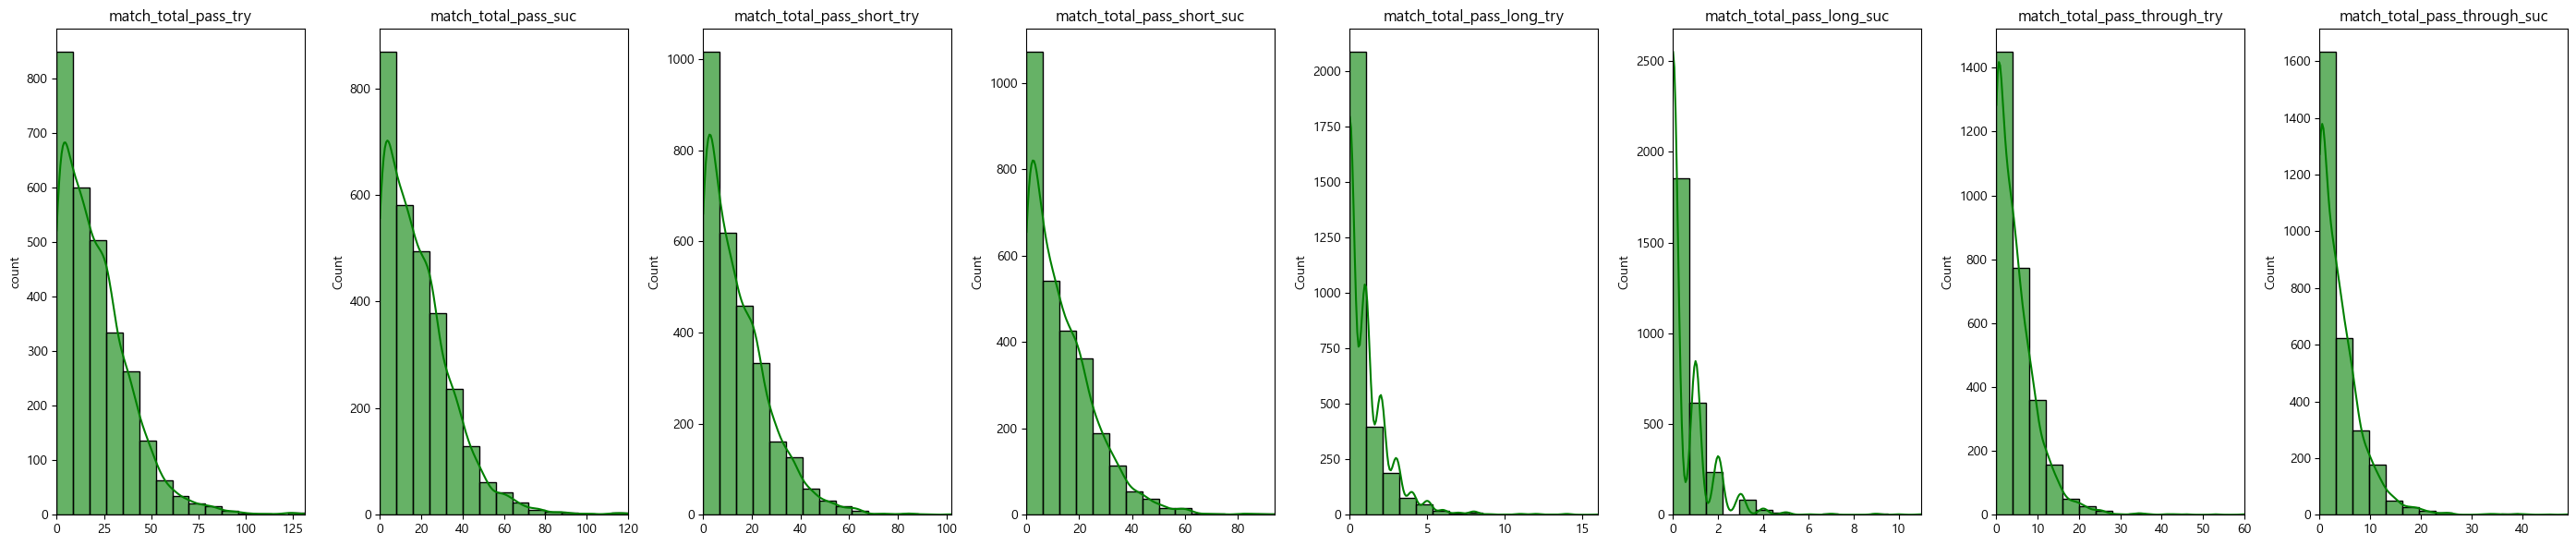

In [23]:
col_hist_all(df3, pass_col)

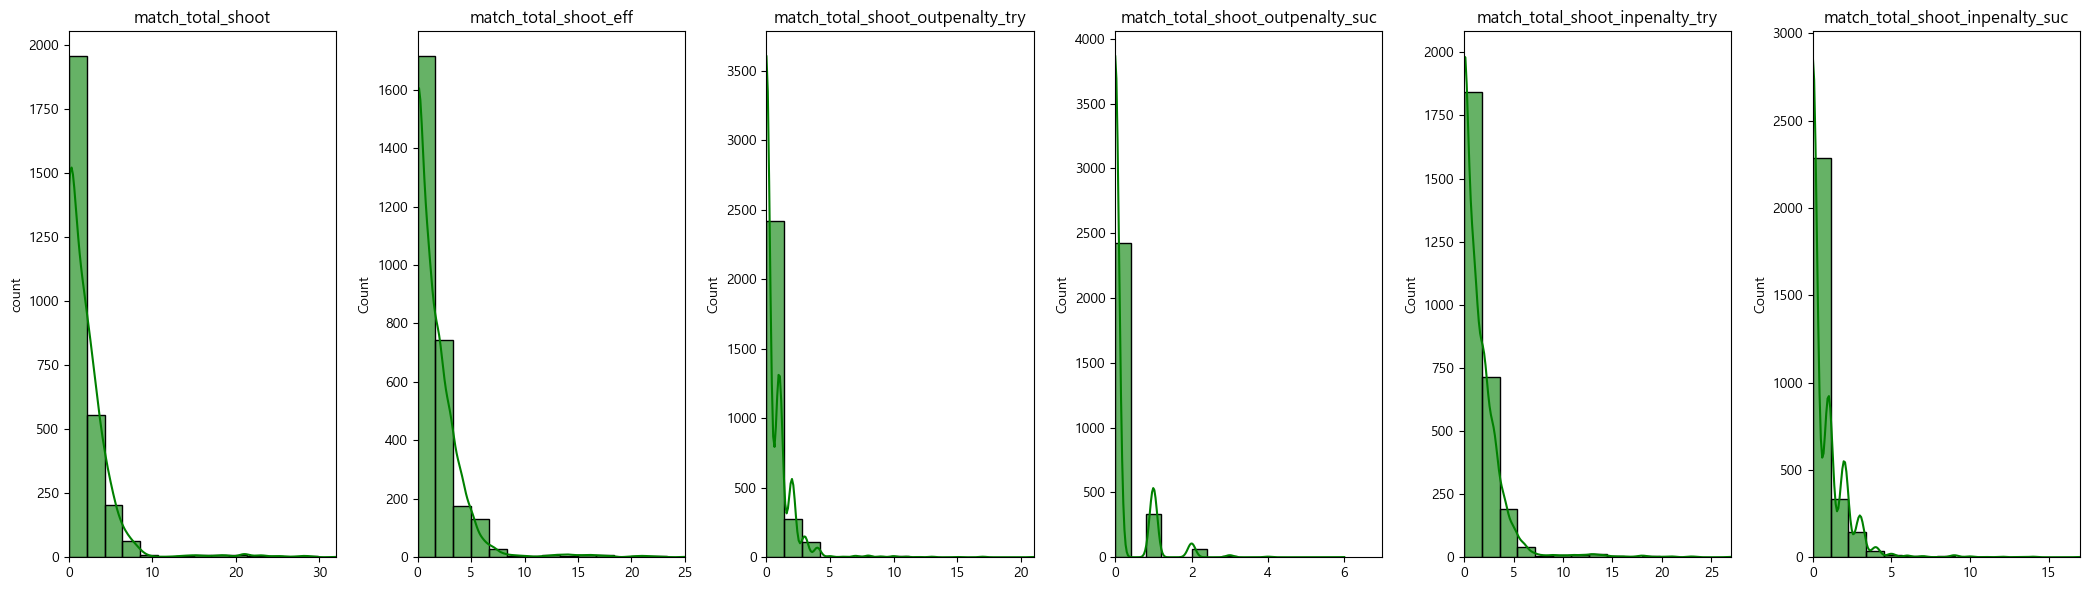

In [24]:
col_hist_all(df3, shoot_col)

---

## 경기 결과에 따른 Stat별 HIST

In [25]:
def col_hist(df_win, df_lose, col_name, sharey_bool) : 
    fig, ax = plt.subplots(ncols = len(col_name), 
                           figsize = (3.5 * len(col_name), 6), 
                           sharey = sharey_bool)
    if len(col_name) == 1:
        ax = [ax]
        
    ax[0].set_ylabel('count')

    for idx, col in enumerate(col_name):
        min_val = 0
        max_val = max(df_win[col].max(), df_lose[col].max())
        
        bins = 15
        
        sns.histplot(df_win[col].values, color = 'blue', kde = True, ax = ax[idx], label = '승', 
                     bins = bins, alpha=0.6)
        sns.histplot(df_lose[col].values, color = 'red', kde = True, ax = ax[idx], label = '패', 
                     bins = bins, alpha=0.6)   
        
        ax[idx].set_title(col_name[idx])
        ax[idx].legend()
    
    plt.tight_layout()
    plt.show()

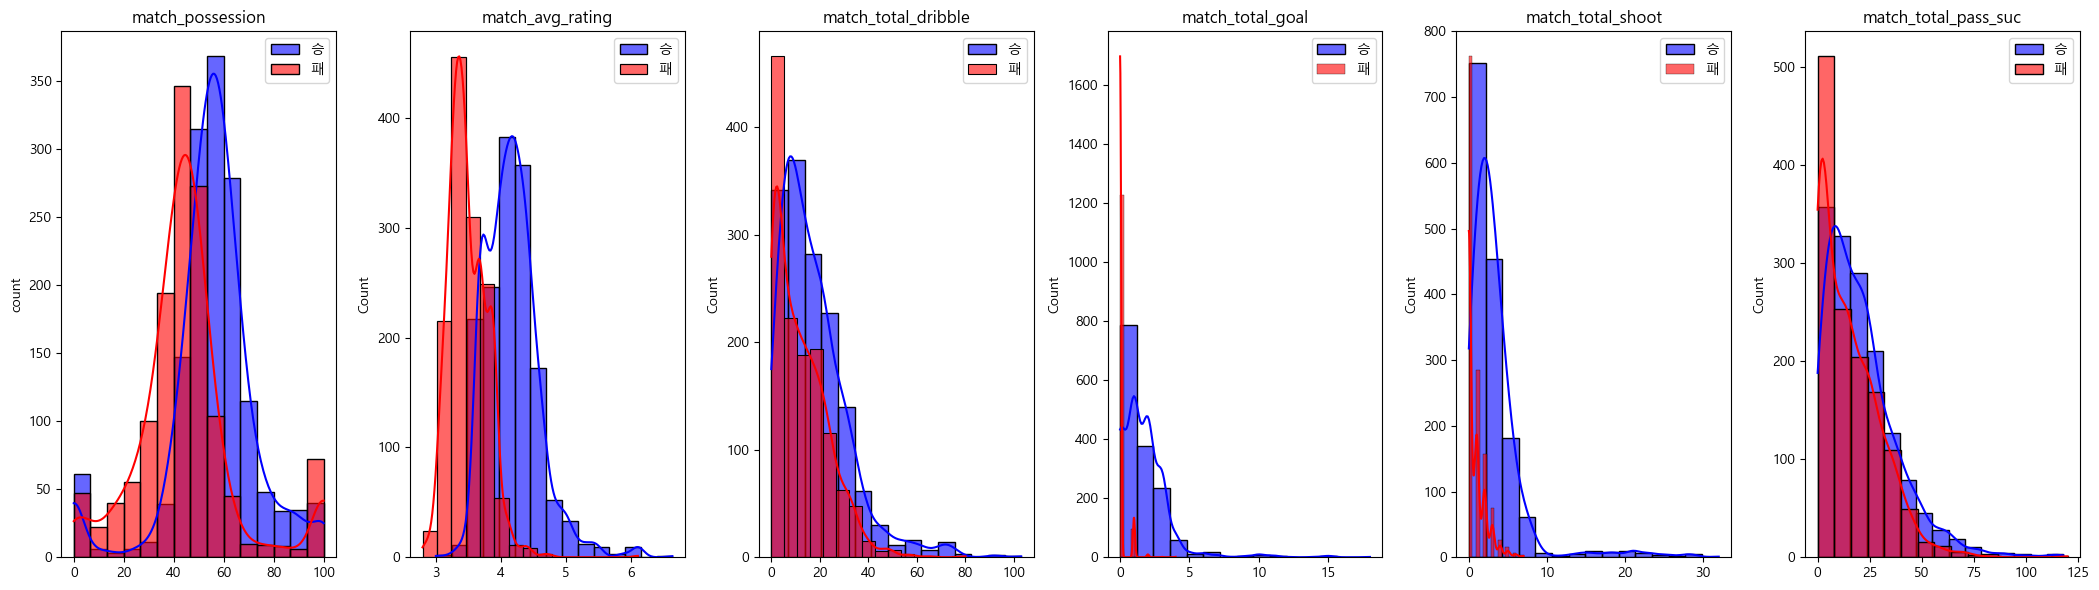

In [26]:
col_hist(df3_win, df3_lose, basic_col, False)

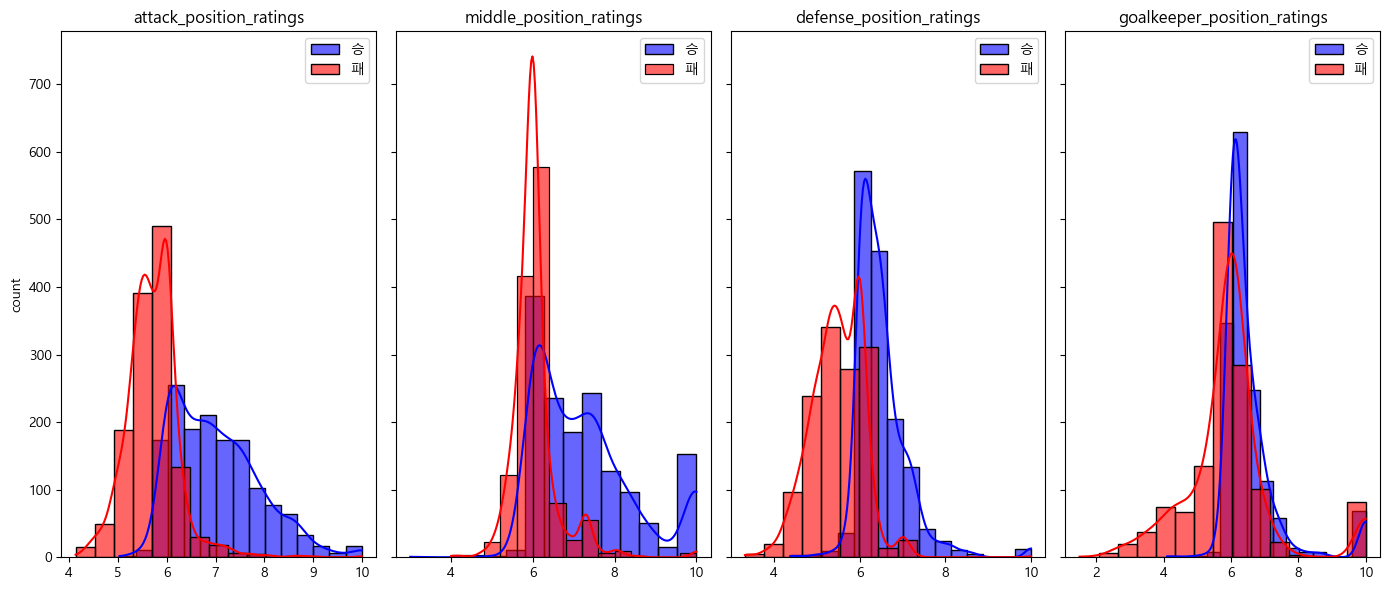

In [27]:
col_hist(df3_win, df3_lose, position_ratings_col, True)

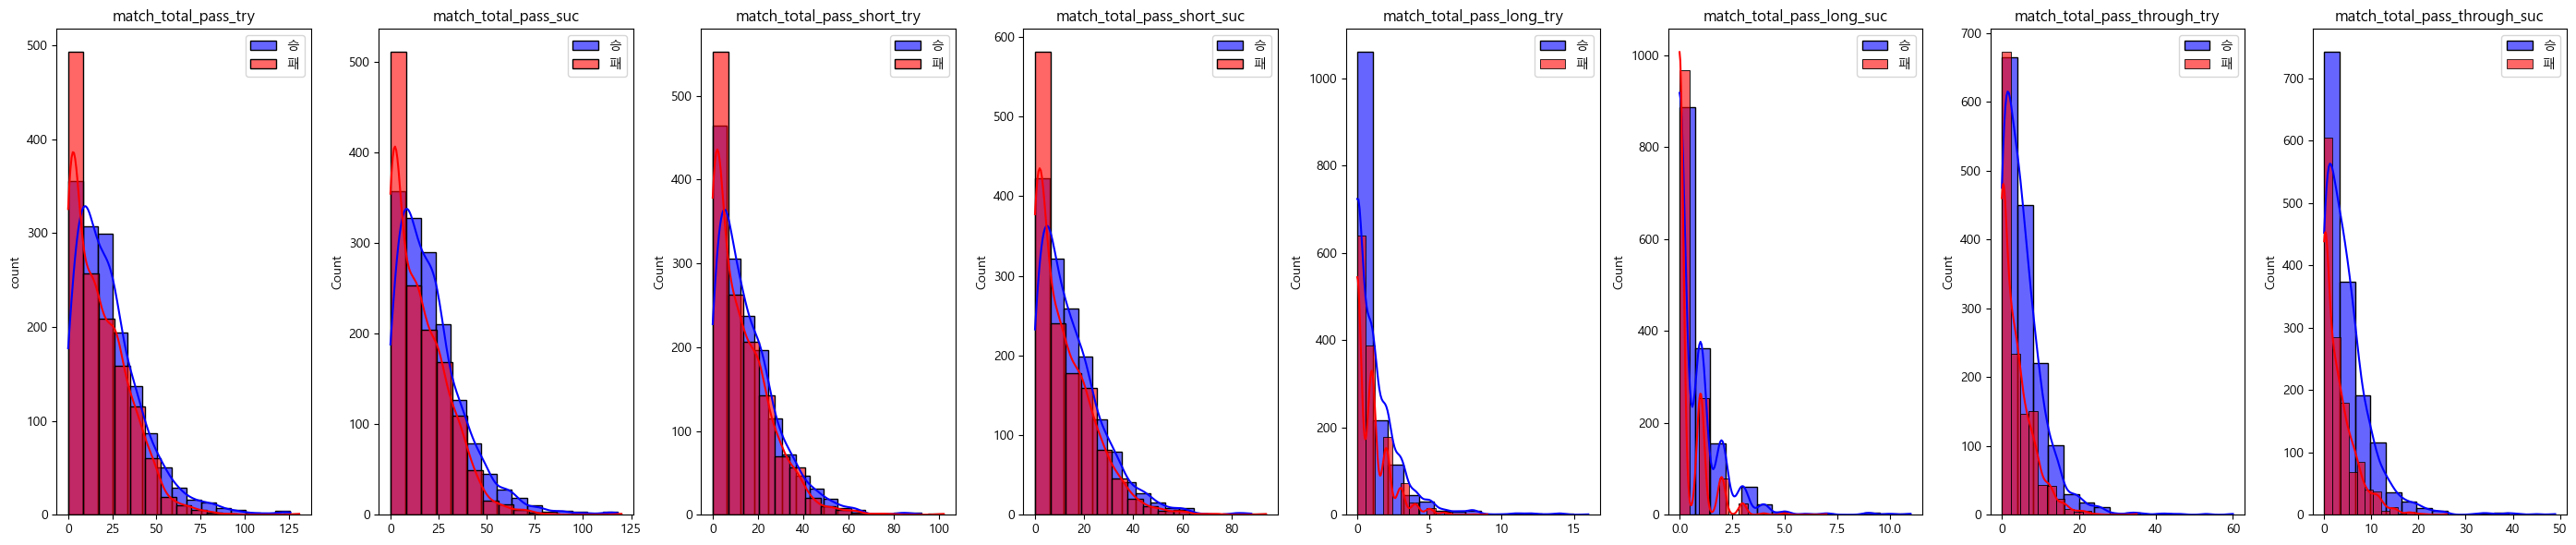

In [28]:
col_hist(df3_win, df3_lose, pass_col, False)

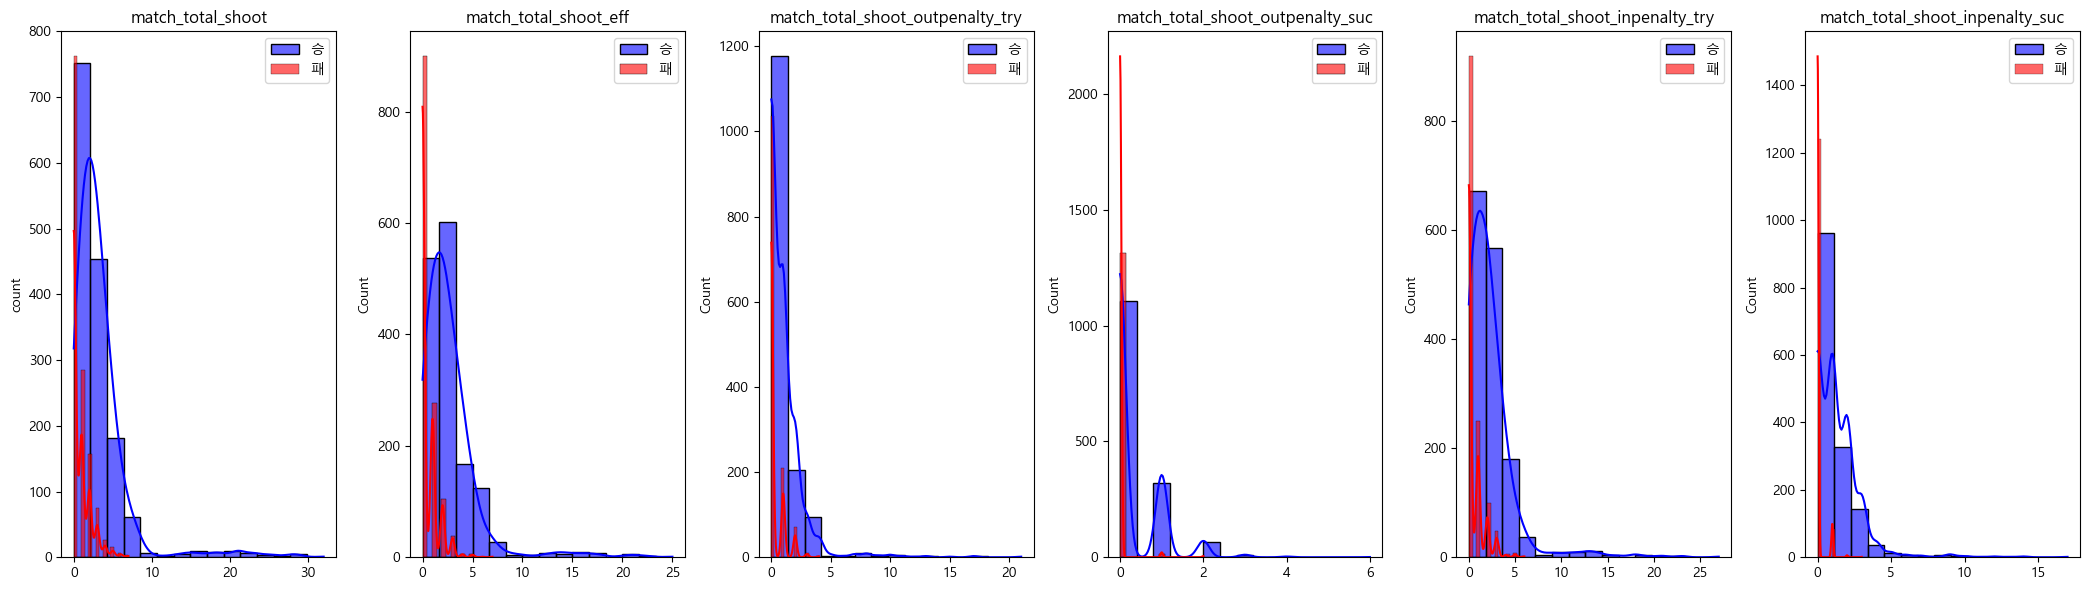

In [29]:
col_hist(df3_win, df3_lose, shoot_col, False)

## 경기 결과에 따른 Stat별  Box-Plot

In [30]:
def col_boxplot(df_win, df_lose, col_name, sharey_bool) : 

    title_list = ['승', '패']

    fig, ax = plt.subplots(ncols = len(col_name), 
                           figsize = (3.5 * len(col_name), 6), 
                           sharey = sharey_bool)
                           
    if len(col_name) == 1:
        ax = [ax]

    ax[0].set_ylabel('count')

    for idx, col in enumerate(col_name):
        data_to_plot = [df_win[col].values, df_lose[col].values]
        ax[idx].boxplot(data_to_plot, tick_labels = title_list);  

        ax[idx].set_xticks([i for i in range(1, len(title_list) + 1)])
        ax[idx].set_xticklabels(title_list)

        ax[idx].set_title(col_name[idx])

### 결과에 따른 Basic Stats

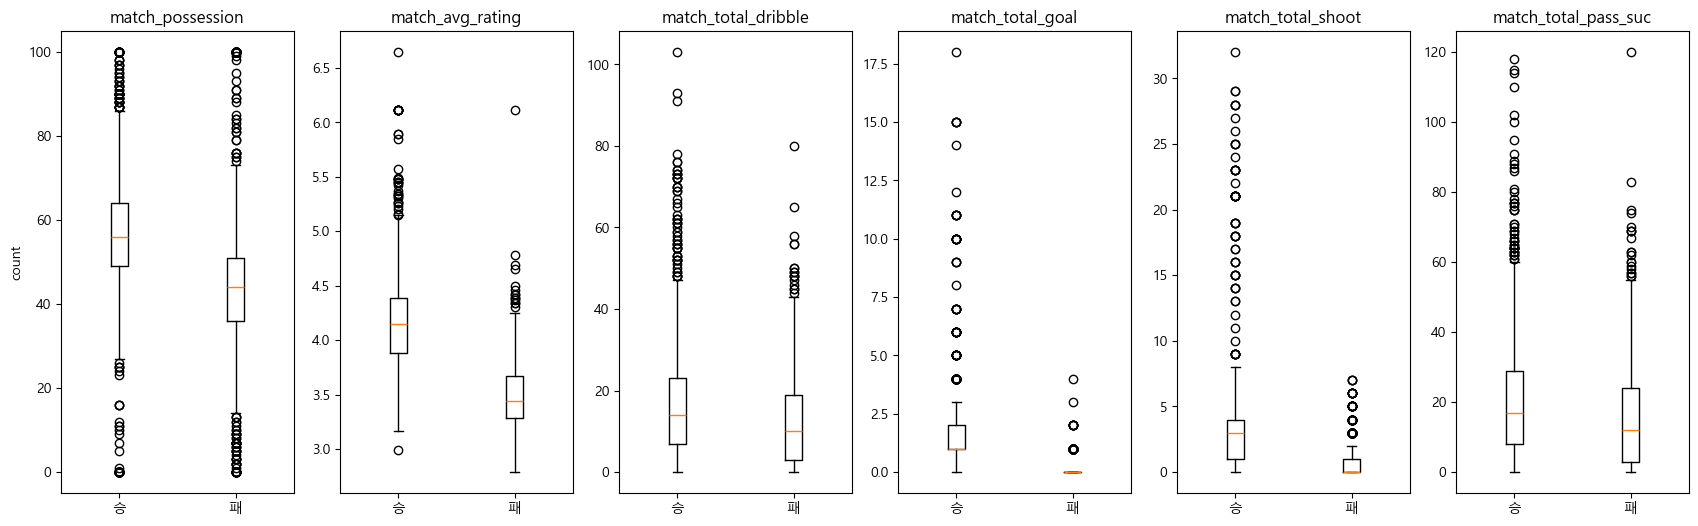

In [31]:
col_boxplot(df3_win, df3_lose, basic_col, False)

### 결과에 따른 Position 별 Ratings

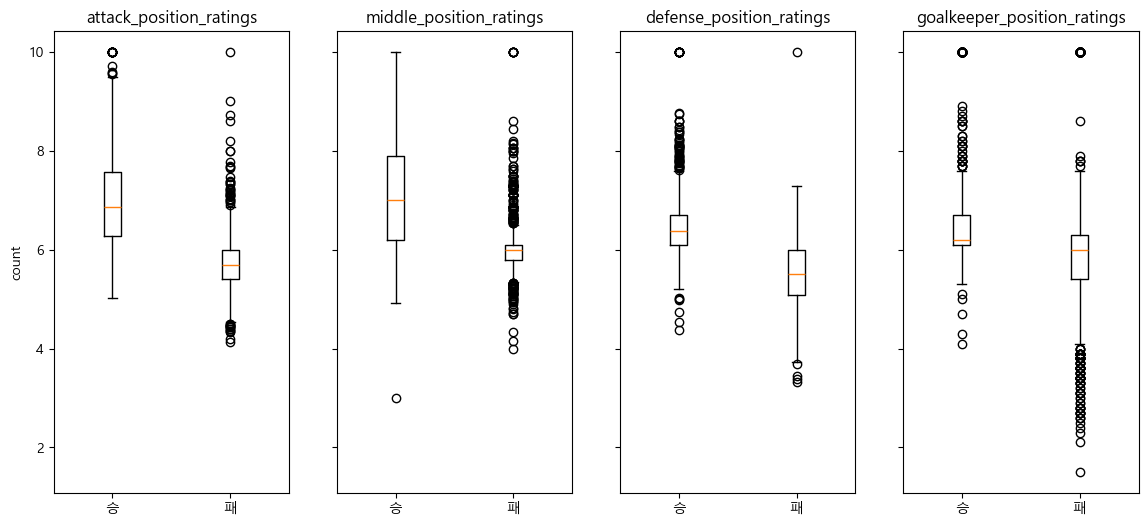

In [32]:
col_boxplot(df3_win, df3_lose, position_ratings_col, True)

### 경기 결과에 따른 Pass stats

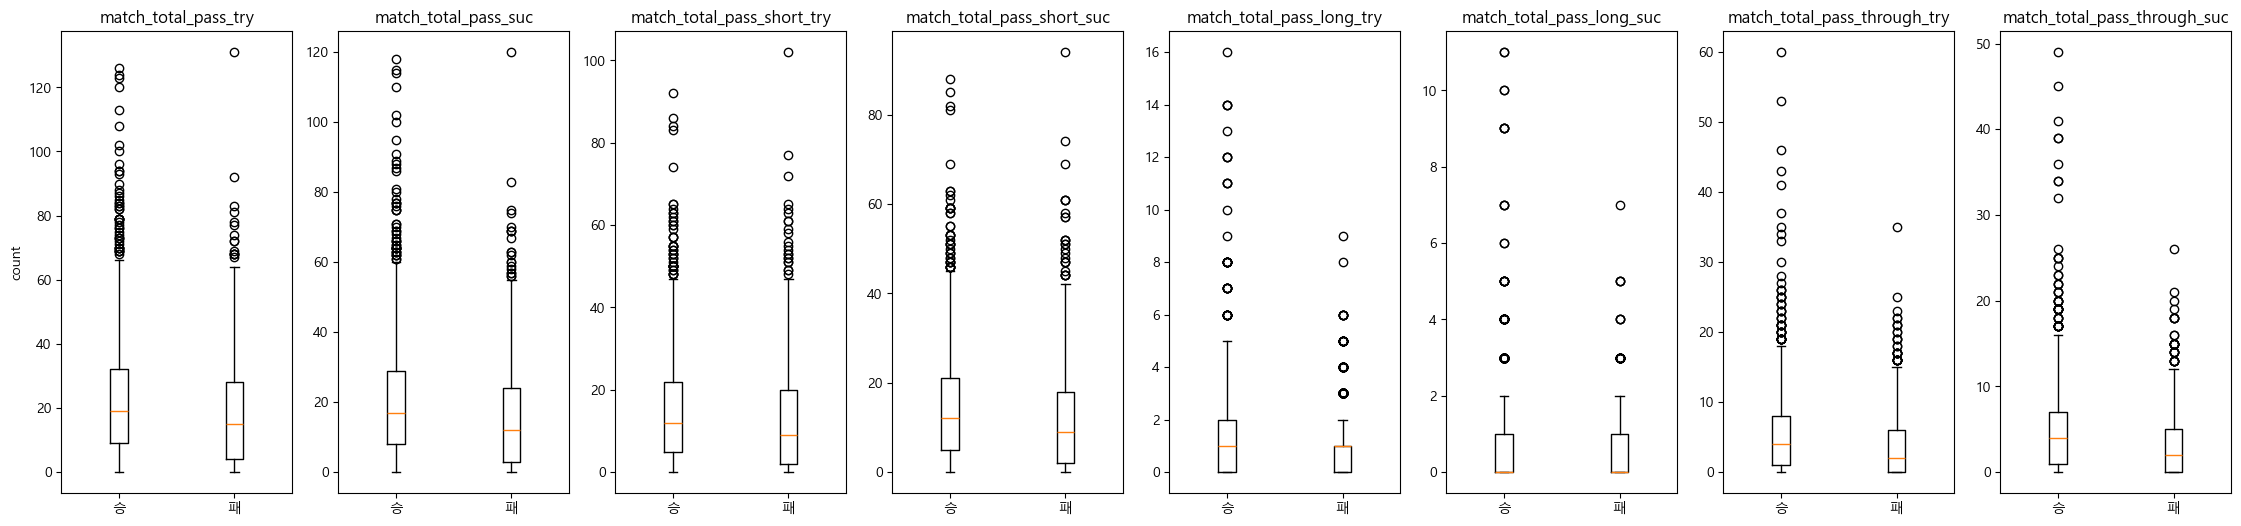

In [33]:
col_boxplot(df3_win, df3_lose, pass_col, False)

### 경기 결과에 따른 Shoot stats

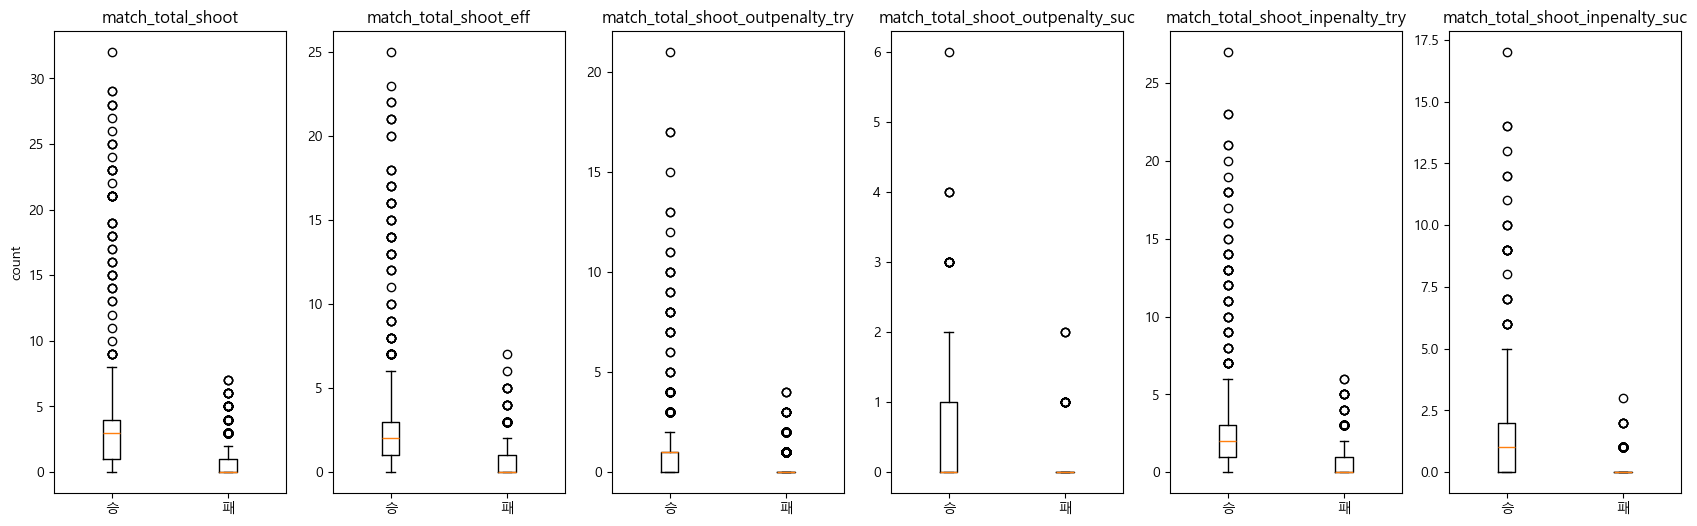

In [34]:
col_boxplot(df3_win, df3_lose, shoot_col, False)

---

In [35]:
from scipy.stats import ttest_ind, shapiro, levene, mannwhitneyu, kstest, norm, probplot

from sklearn.preprocessing import power_transform

In [36]:
df3_qq = df3.copy()

## Stat별 QQ plot

In [65]:
def col_qqplot_all(df, col_name) : 
    fig, ax = plt.subplots(ncols = len(col_name), 
                           figsize = (3.5 * len(col_name), 6))
                           
    if len(col_name) == 1:
        ax = [ax]

    ax[0].set_ylabel('count')

    for idx, col in enumerate(col_name):
        stats.probplot(df[col], dist = "norm", plot = ax[idx])
        
        ax[idx].set_title(col_name[idx])

    plt.tight_layout()
    plt.show()

In [66]:
def col_qqplot_norm_all(df, col_name) : 
    fig, ax = plt.subplots(ncols = len(col_name), 
                           figsize = (3.5 * len(col_name), 6))
                           
    if len(col_name) == 1:
        ax = [ax]

    ax[0].set_ylabel('count')
    
    for idx, col in enumerate(col_name):
        df[col] = power_transform(df[col].values.reshape(-1, 1), method = 'yeo-johnson')

        stats.probplot(df[col], dist = "norm", plot = ax[idx])
        
        ax[idx].set_title(col_name[idx])

    plt.tight_layout()
    plt.show()

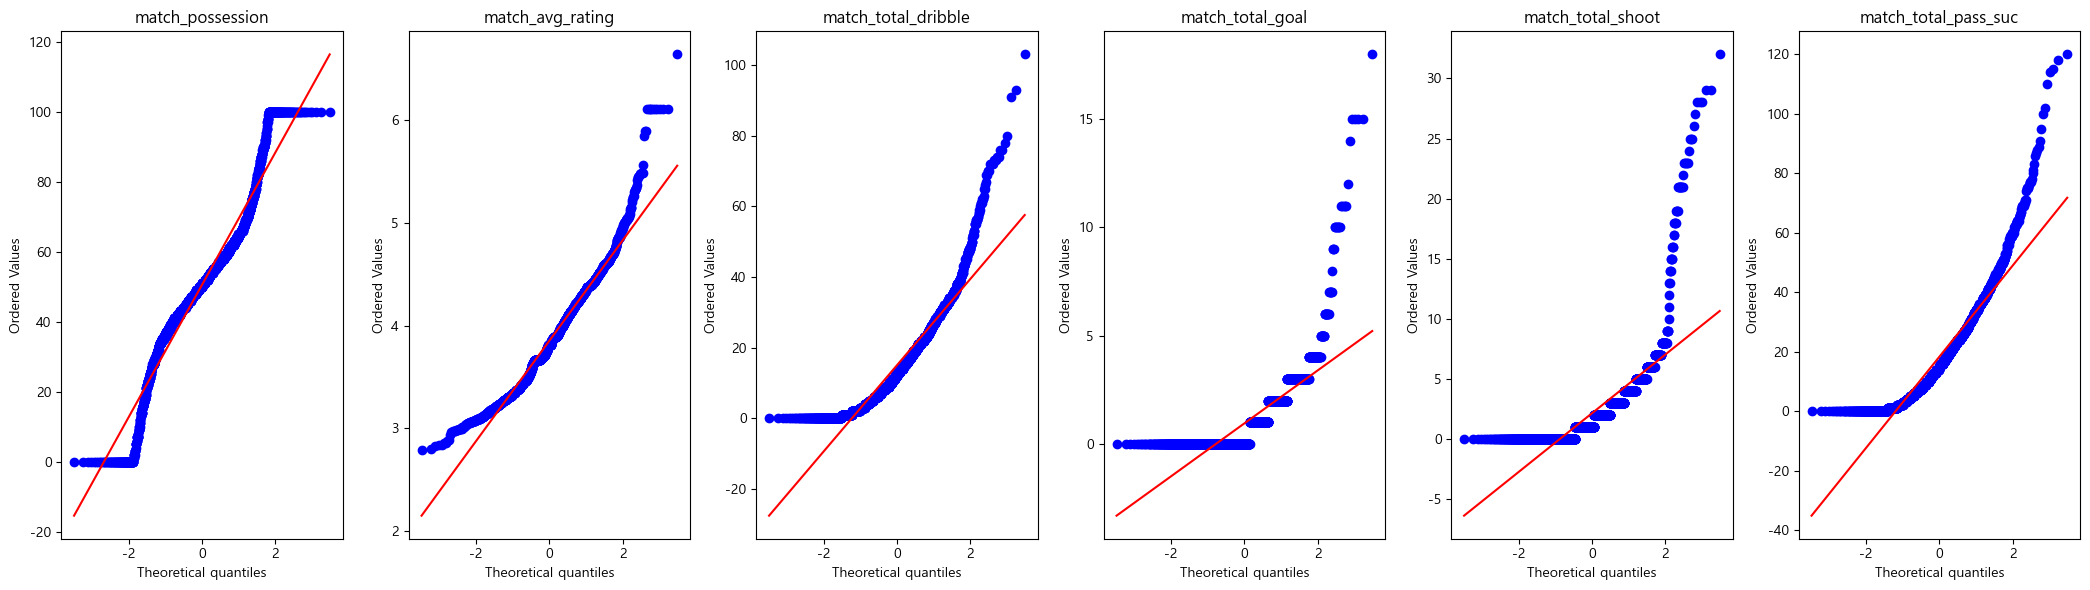

In [67]:
col_qqplot_all(df3, basic_col)

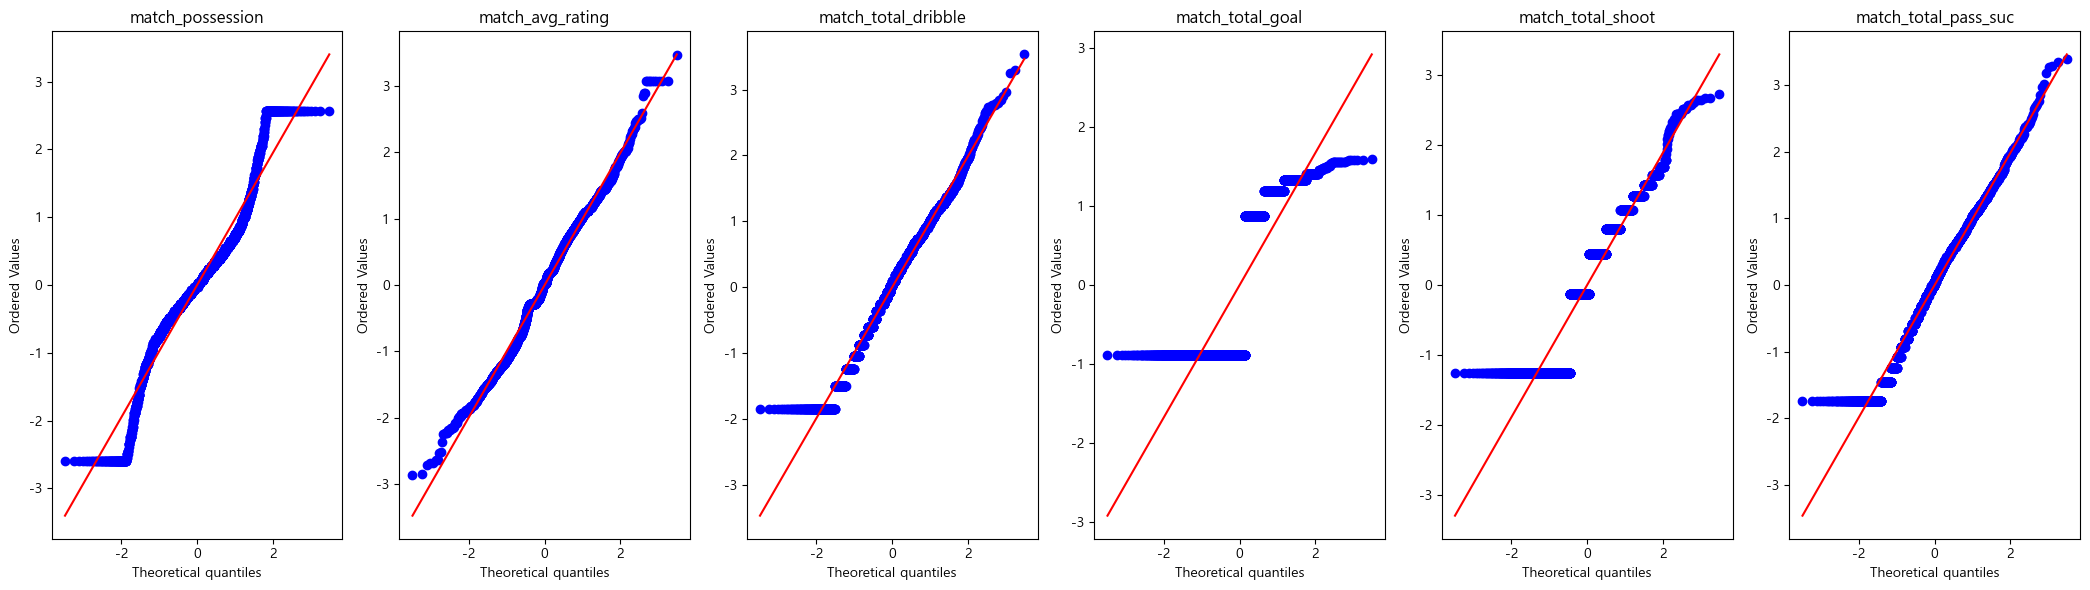

In [68]:
col_qqplot_norm_all(df3_qq, basic_col)

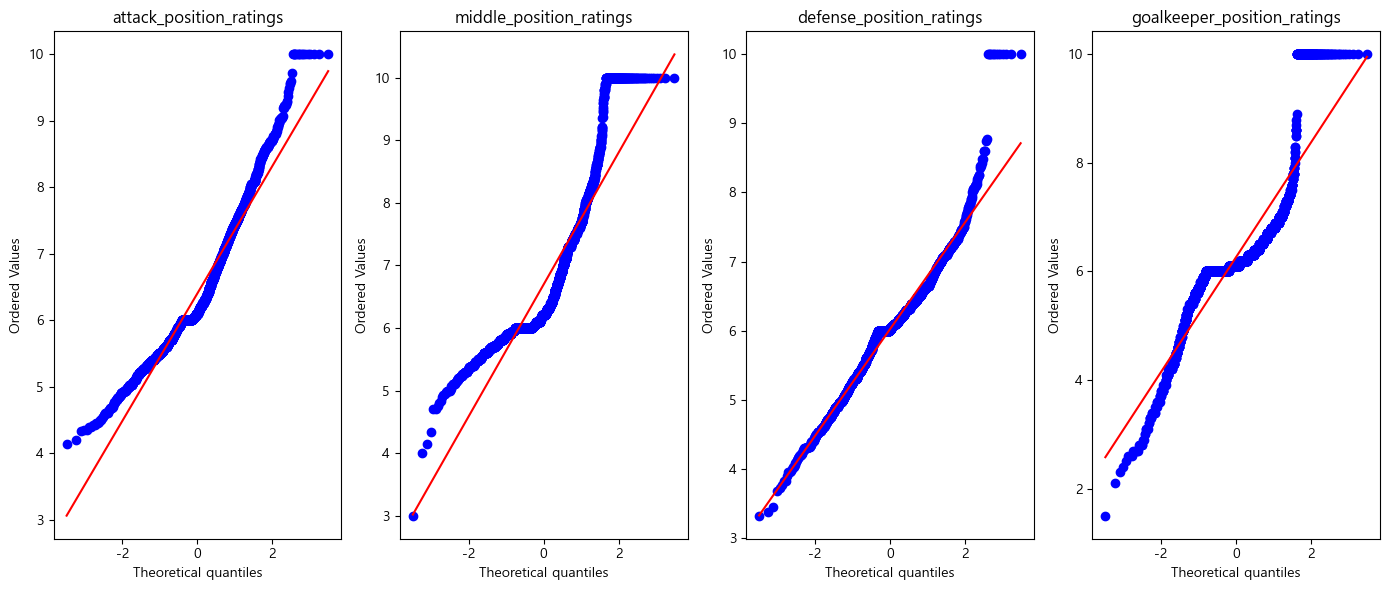

In [69]:
col_qqplot_all(df3, position_ratings_col)

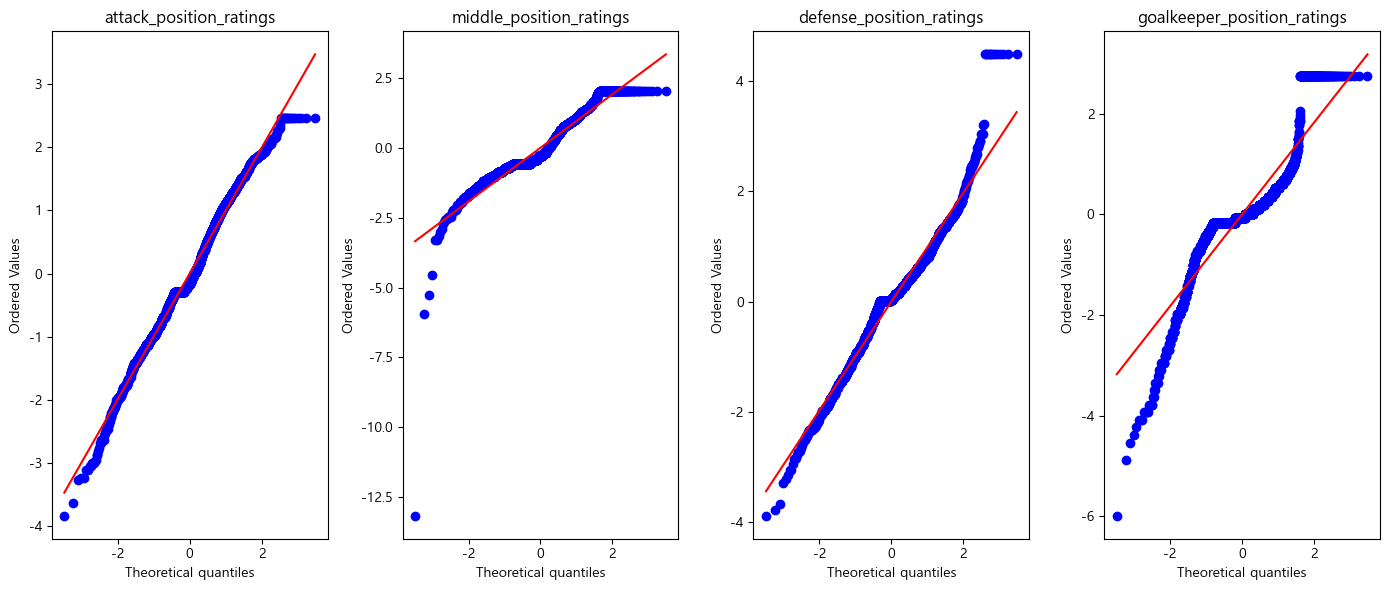

In [70]:
col_qqplot_norm_all(df3_qq, position_ratings_col)

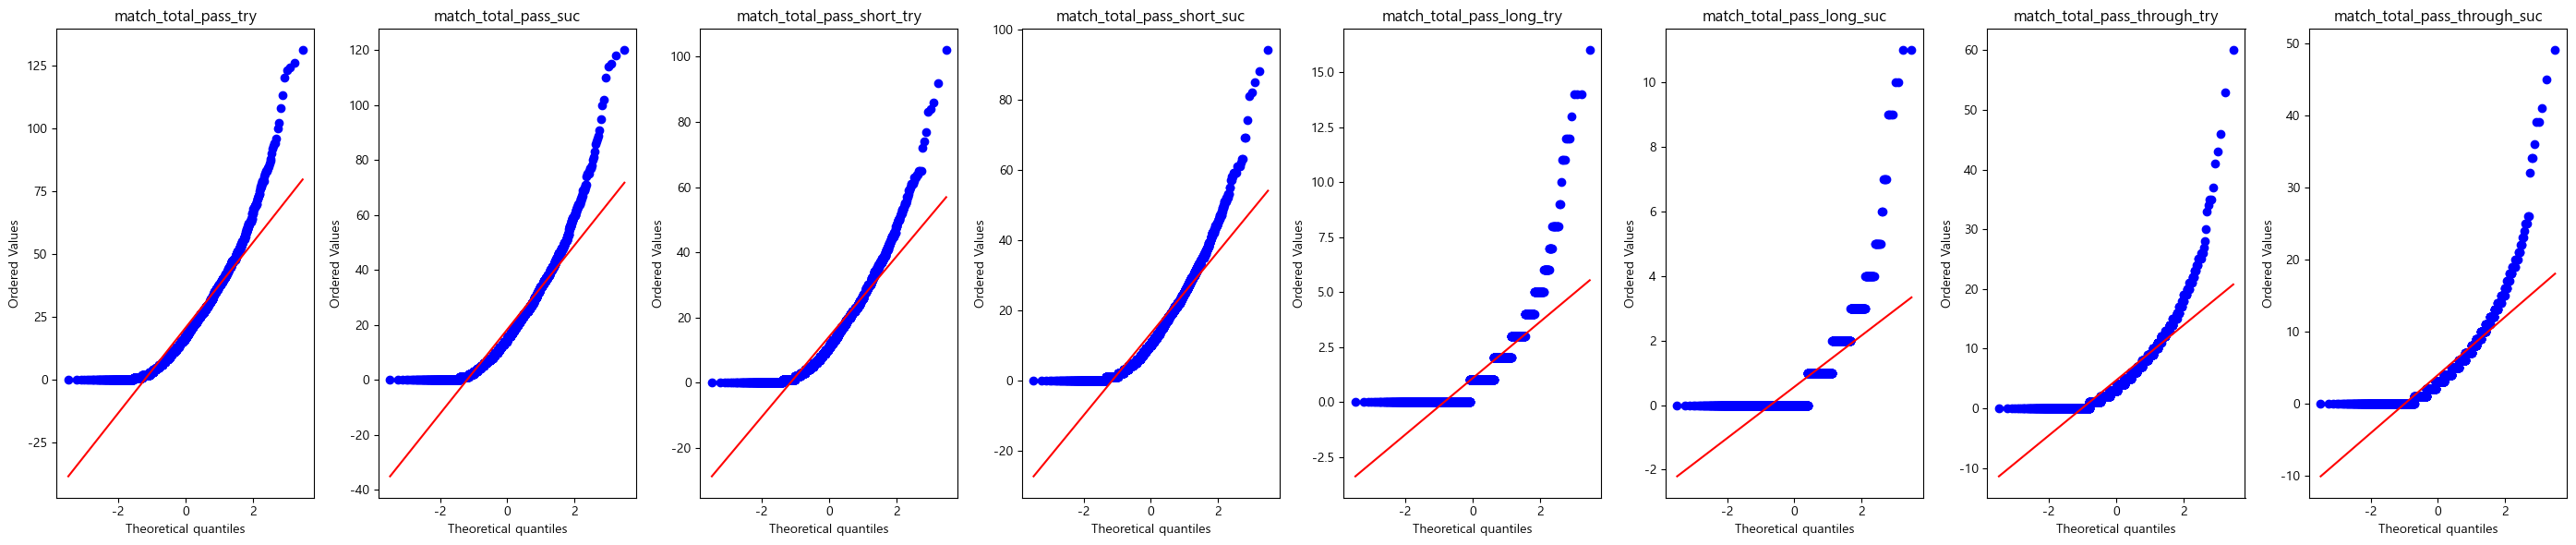

In [71]:
col_qqplot_all(df3, pass_col)

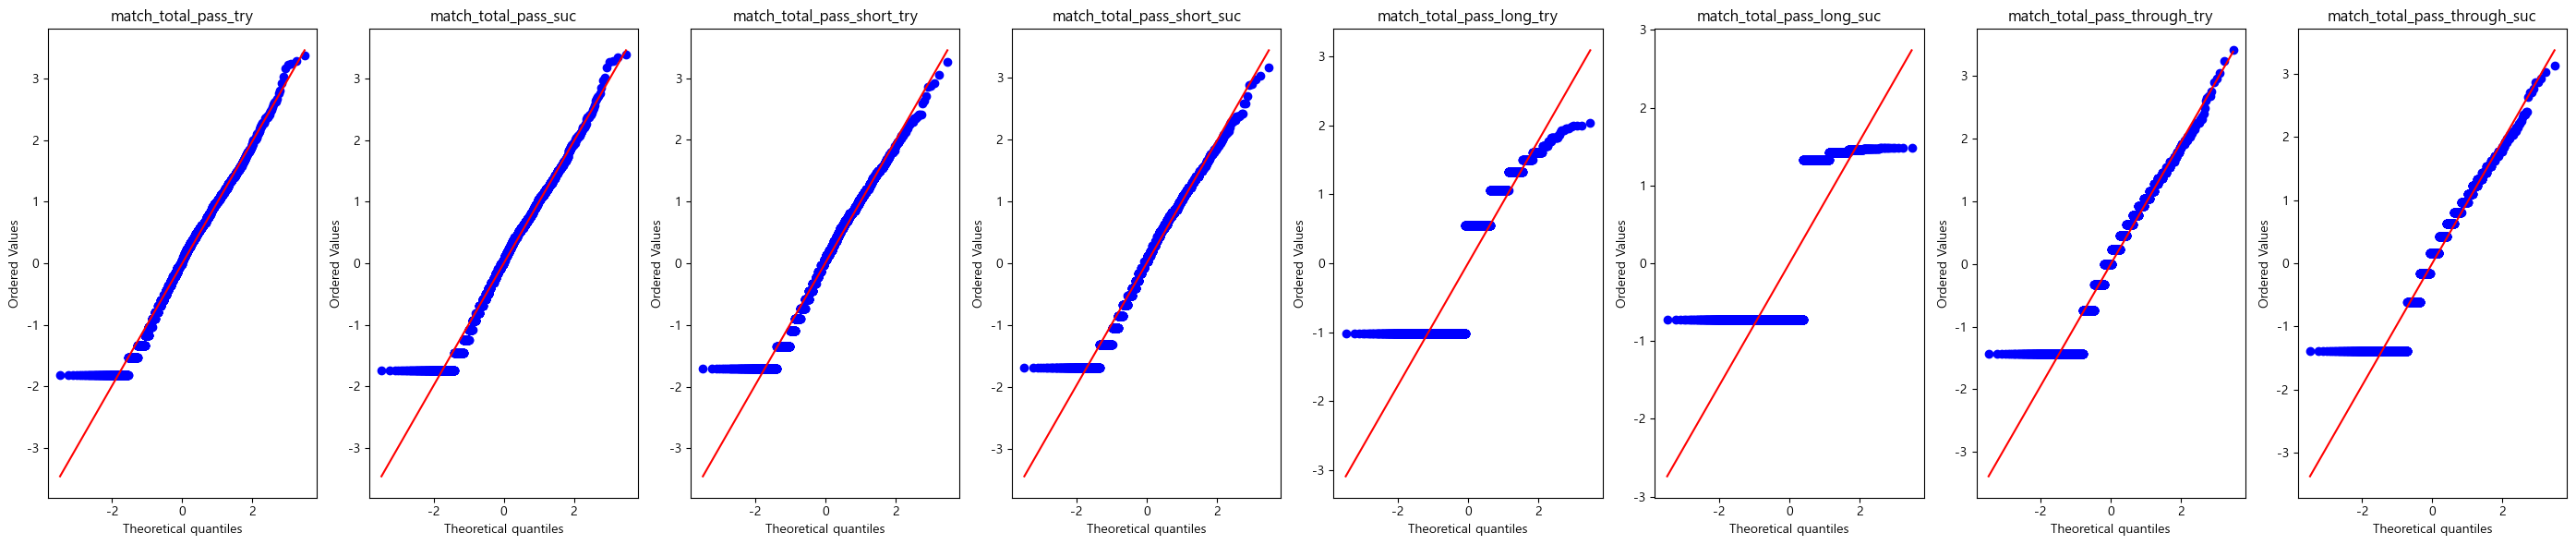

In [72]:
col_qqplot_norm_all(df3_qq, pass_col)

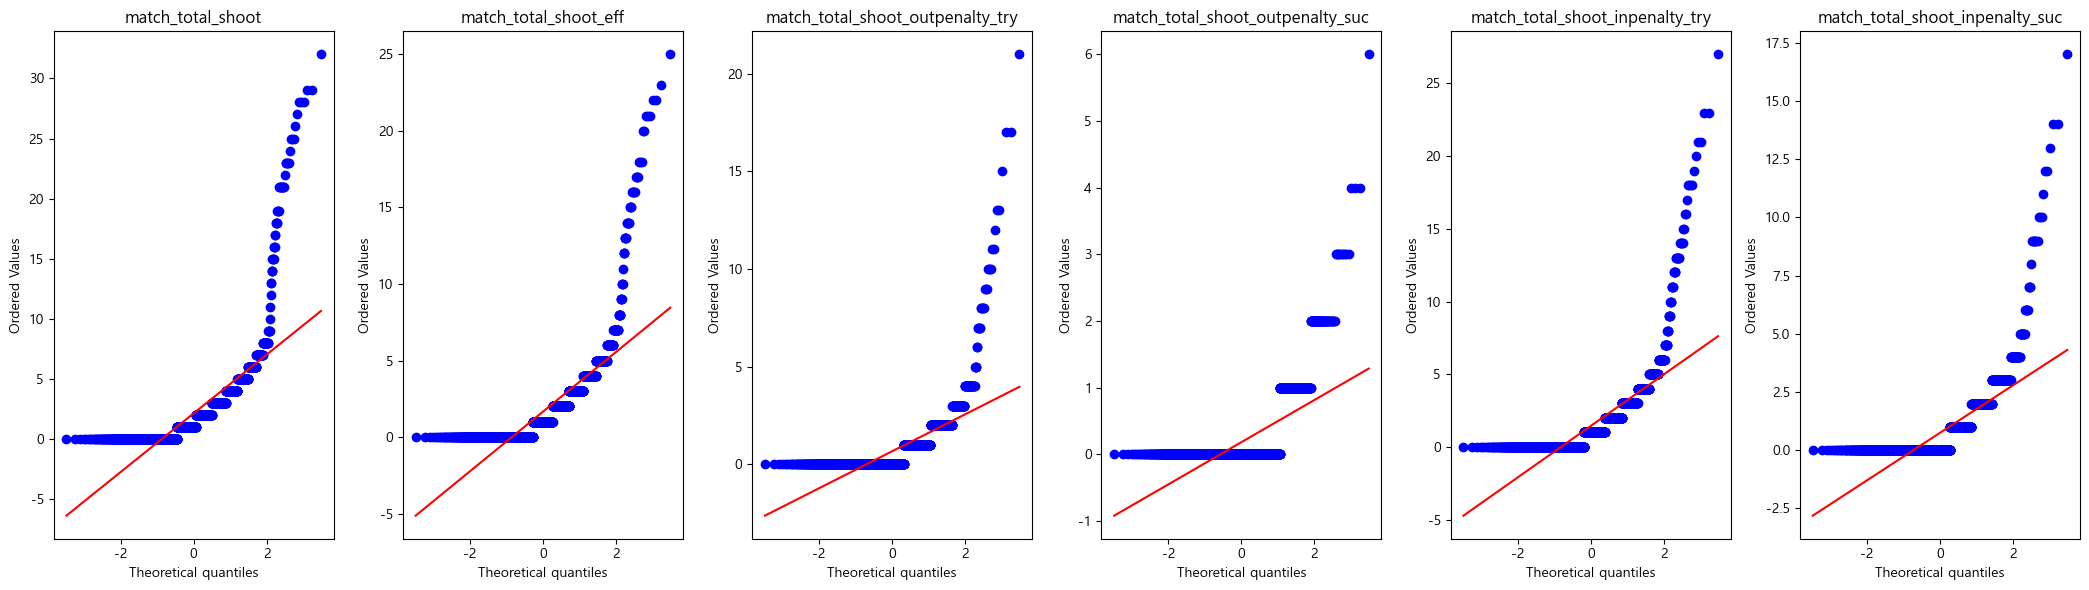

In [73]:
col_qqplot_all(df3, shoot_col)

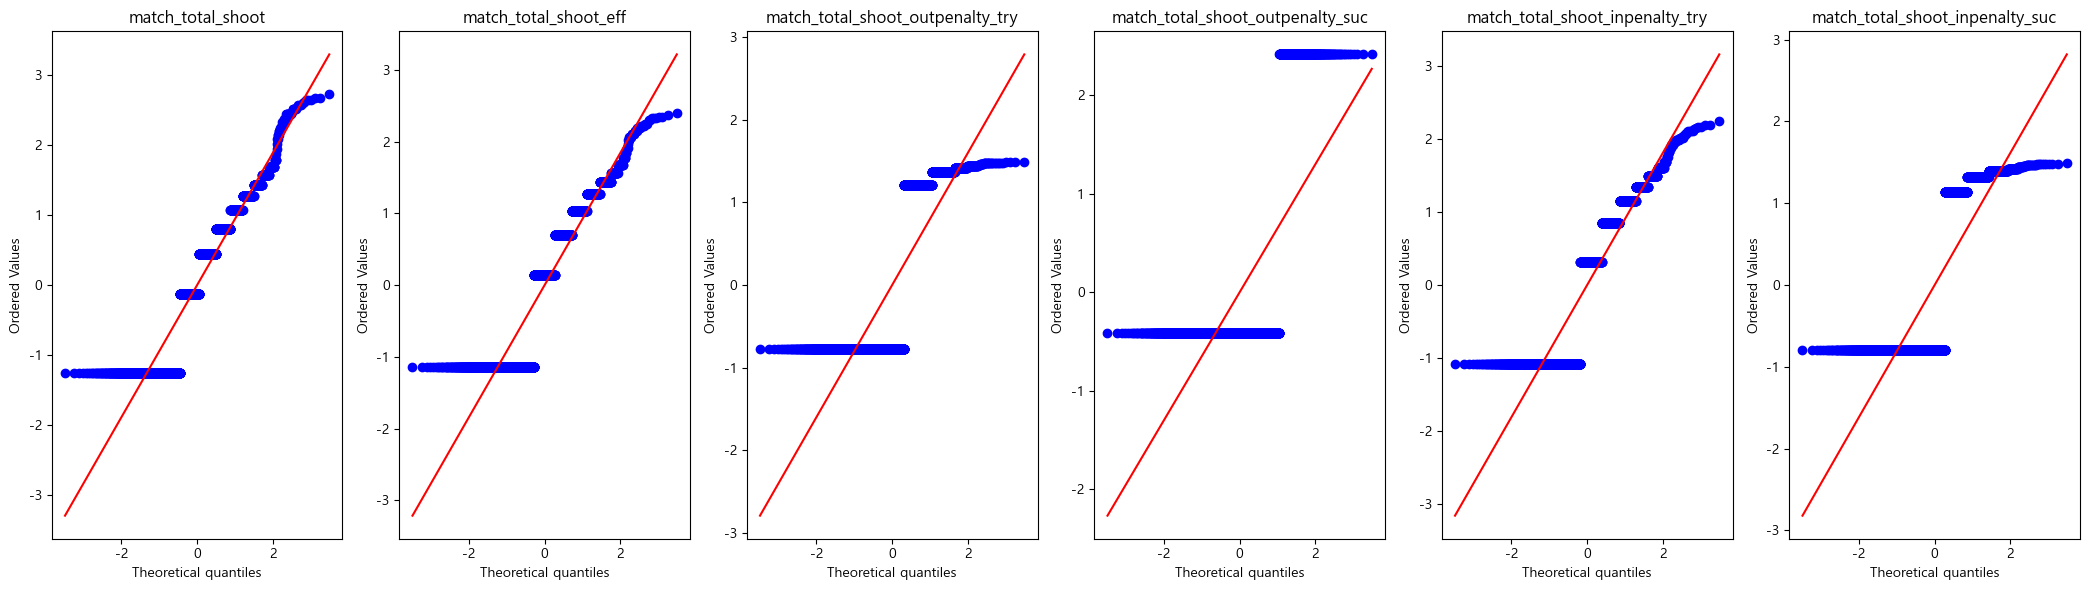

In [74]:
col_qqplot_norm_all(df3_qq, shoot_col)

---

---

In [47]:
# 1. 정규성 검정 (Shapiro-Wilk test)
def normality_test(df_win, df_lose, columns):
    columns_normality_O = []
    columns_normality_X = []
    
    columns_homogeneity_O = []
    columns_homogeneity_X = []

    for col in columns:
        stat_win_shap, p_val_win_shap = shapiro(df_win[col])
        stat_lose_shap, p_val_lose_shap = shapiro(df_lose[col])
        
        stat_win_kosm, p_val_win_kosm = kstest(df_win[col], 'norm', args=(df_win[col].mean(), df_win[col].std()))
        stat_lose_kosm, p_val_lose_kosm = kstest(df_lose[col], 'norm', args=(df_lose[col].mean(), df_lose[col].std()))
        
        stat, p_val = levene(df_win[col], df_lose[col])

        print(f'{col} \n 승: p-value={p_val_win_shap, p_val_win_kosm} \
                      \n 패: p-value={p_val_lose_shap, p_val_lose_kosm} \
                      \n Levene’s test p-value={p_val}')
              
        if p_val_win_shap > 0.05 and p_val_lose_shap > 0.05:
            columns_normality_O.append(col) 

        else:
            if p_val_win_kosm > 0.05 and p_val_lose_kosm > 0.05:
                columns_normality_O.append(col)  

            else:
                columns_normality_X.append(col) 

        # 등분산성 검정 결과
        if p_val > 0.05:
            columns_homogeneity_O.append(col)  
            
        else:
            columns_homogeneity_X.append(col) 

    print('-----------------------------------------------------')
    print(f"정규분포 O: \n {', '.join(columns_normality_O)}")
    print('-----------------------------------------------------')
    print(f"정규분포 X: \n {', '.join(columns_normality_X)}")
    print('-----------------------------------------------------')
    print(f"등분산성 O: \n {', '.join(columns_homogeneity_O)}")
    print('-----------------------------------------------------')
    print(f"등분산성 X: \n {', '.join(columns_homogeneity_X)}")
    print('-----------------------------------------------------')

In [48]:
normality_test(df3_win, df3_lose, basic_col)

match_possession 
 승: p-value=(5.935379116954402e-31, 1.3380833567564825e-21)                       
 패: p-value=(5.886394975938547e-29, 1.1478557473681182e-23)                       
 Levene’s test p-value=0.012549646040513018
match_avg_rating 
 승: p-value=(1.0763036381994577e-26, 4.5377200478118223e-08)                       
 패: p-value=(4.4315391785077026e-21, 1.9875185766544254e-08)                       
 Levene’s test p-value=5.1272281183398695e-18
match_total_dribble 
 승: p-value=(6.549241657039899e-33, 4.181311620407435e-16)                       
 패: p-value=(1.8382034383207595e-28, 2.1035754621395002e-20)                       
 Levene’s test p-value=1.3103672580090575e-06
match_total_goal 
 승: p-value=(8.774614619290709e-45, 3.0237052365560305e-56)                       
 패: p-value=(1.680535454207698e-57, 0.0)                       
 Levene’s test p-value=2.0523338798328432e-125
match_total_shoot 
 승: p-value=(3.0616204383197552e-49, 7.024313787445983e-69)                 

In [49]:
normality_test(df3_win, df3_lose, position_ratings_col)

attack_position_ratings 
 승: p-value=(9.31242048235124e-24, 1.167155455723347e-10)                       
 패: p-value=(2.5796906008506833e-25, 1.0638470360683403e-12)                       
 Levene’s test p-value=1.0942248374917654e-70
middle_position_ratings 
 승: p-value=(1.299561515316271e-31, 1.91511453300061e-18)                       
 패: p-value=(7.50929478123333e-39, 2.959182460582386e-54)                       
 Levene’s test p-value=4.670362614388794e-129
defense_position_ratings 
 승: p-value=(2.85010740508106e-37, 1.8896573330509482e-28)                       
 패: p-value=(5.8138132878533035e-15, 6.152807420751613e-06)                       
 Levene’s test p-value=2.752225445967105e-06
goalkeeper_position_ratings 
 승: p-value=(1.5650874898757576e-48, 1.6688729092627415e-80)                       
 패: p-value=(4.1526424346161524e-34, 1.2567321770874771e-42)                       
 Levene’s test p-value=6.808029082920177e-21
-----------------------------------------------------

In [50]:
normality_test(df3_win, df3_lose, pass_col)

match_total_pass_try 
 승: p-value=(1.1052601992646779e-31, 9.027938549438186e-17)                       
 패: p-value=(7.425342784937636e-29, 2.5907261639718376e-21)                       
 Levene’s test p-value=0.008527096481622991
match_total_pass_suc 
 승: p-value=(8.883031219512443e-32, 2.5768710209528287e-17)                       
 패: p-value=(5.6911312898653954e-30, 3.301532579823402e-24)                       
 Levene’s test p-value=0.0006601240574348132
match_total_pass_short_try 
 승: p-value=(7.229373126409047e-32, 9.69958453724729e-21)                       
 패: p-value=(1.7323760185519656e-32, 1.3693101177545754e-29)                       
 Levene’s test p-value=0.30390319444146324
match_total_pass_short_suc 
 승: p-value=(5.020918757136039e-32, 3.0337103923210168e-21)                       
 패: p-value=(7.14861225578693e-33, 9.085979883396704e-31)                       
 Levene’s test p-value=0.08365975290677732
match_total_pass_long_try 
 승: p-value=(4.513939010550249e-47, 2

In [51]:
normality_test(df3_win, df3_lose, shoot_col)

match_total_shoot 
 승: p-value=(3.0616204383197552e-49, 7.024313787445983e-69)                       
 패: p-value=(2.36858109170826e-43, 9.487712292481794e-122)                       
 Levene’s test p-value=3.1757499611929044e-42
match_total_shoot_eff 
 승: p-value=(1.201192576299291e-46, 4.129273275216606e-60)                       
 패: p-value=(4.092092626298465e-47, 1.309720967214775e-183)                       
 Levene’s test p-value=9.392397229016706e-59
match_total_shoot_outpenalty_try 
 승: p-value=(3.6652057676516276e-52, 7.69329340490785e-106)                       
 패: p-value=(1.9457344844530144e-50, 2.865684703316727e-259)                       
 Levene’s test p-value=9.400243475321564e-54
match_total_shoot_outpenalty_suc 
 승: p-value=(2.0941524520920926e-51, 2.354346272448411e-261)                       
 패: p-value=(3.860997500435917e-62, 0.0)                       
 Levene’s test p-value=2.4991195165461805e-69
match_total_shoot_inpenalty_try 
 승: p-value=(1.186503309073045

In [52]:
def group_difference_test(df_win, df_lose, columns):
    for col in columns:
        # 정규성 여부에 따라 검정 방법 선택
        stat_win_shap, p_val_win_shap = shapiro(df_win[col])
        stat_lose_shap, p_val_lose_shap = shapiro(df_lose[col])
        
        stat_win_kosm, p_val_win_kosm = kstest(df_win[col], 'norm', args=(df_win[col].mean(), df_win[col].std()))
        stat_lose_kosm, p_val_lose_kosm = kstest(df_lose[col], 'norm', args=(df_lose[col].mean(), df_lose[col].std()))
        
        if (p_val_win_shap > 0.05 and p_val_lose_shap > 0.05) or (p_val_win_kosm > 0.05 and p_val_lose_kosm > 0.05):  # 정규분포를 따를 경우
            stat, p_val = ttest_ind(df_win[col], df_lose[col], equal_var=True)  
            test_type = "t-test"
            
        else:  # 정규분포를 따르지 않을 경우
            stat, p_val = mannwhitneyu(df_win[col], df_lose[col])
            test_type = "Mann-Whitney U test"
        
        print('-----------------------------------------------------')

        if p_val < 0.05:
            print(f'{col}은(는) 승패에 따라 유의미한 차이가 있음')
        else:
            print(f'{col}은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX')

In [53]:
group_difference_test(df3_win, df3_lose, basic_col)

-----------------------------------------------------
match_possession은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_avg_rating은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_dribble은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_goal은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_suc은(는) 승패에 따라 유의미한 차이가 있음


In [54]:
group_difference_test(df3_win, df3_lose, position_ratings_col)

-----------------------------------------------------
attack_position_ratings은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
middle_position_ratings은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
defense_position_ratings은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
goalkeeper_position_ratings은(는) 승패에 따라 유의미한 차이가 있음


In [55]:
group_difference_test(df3_win, df3_lose, shoot_col)

-----------------------------------------------------
match_total_shoot은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_eff은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_outpenalty_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_outpenalty_suc은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_inpenalty_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_inpenalty_suc은(는) 승패에 따라 유의미한 차이가 있음


In [56]:
group_difference_test(df3_win, df3_lose, pass_col)

-----------------------------------------------------
match_total_pass_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_suc은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_short_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_short_suc은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_long_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_long_suc은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_through_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_through_suc은(는) 승패에 따라 유의미한 차이가 있음


---

In [57]:
list(df2_temp.columns)

['match_possession',
 'goalkeeper_position_ratings',
 'match_total_pass_short_suc',
 'match_total_pass_long_try',
 'match_total_pass_long_suc',
 'match_total_pass_through_suc',
 'match_total_shoot_outpenalty_try',
 'match_total_shoot_outpenalty_suc',
 'match_total_shoot_inpenalty_try',
 'match_total_shoot_inpenalty_suc']

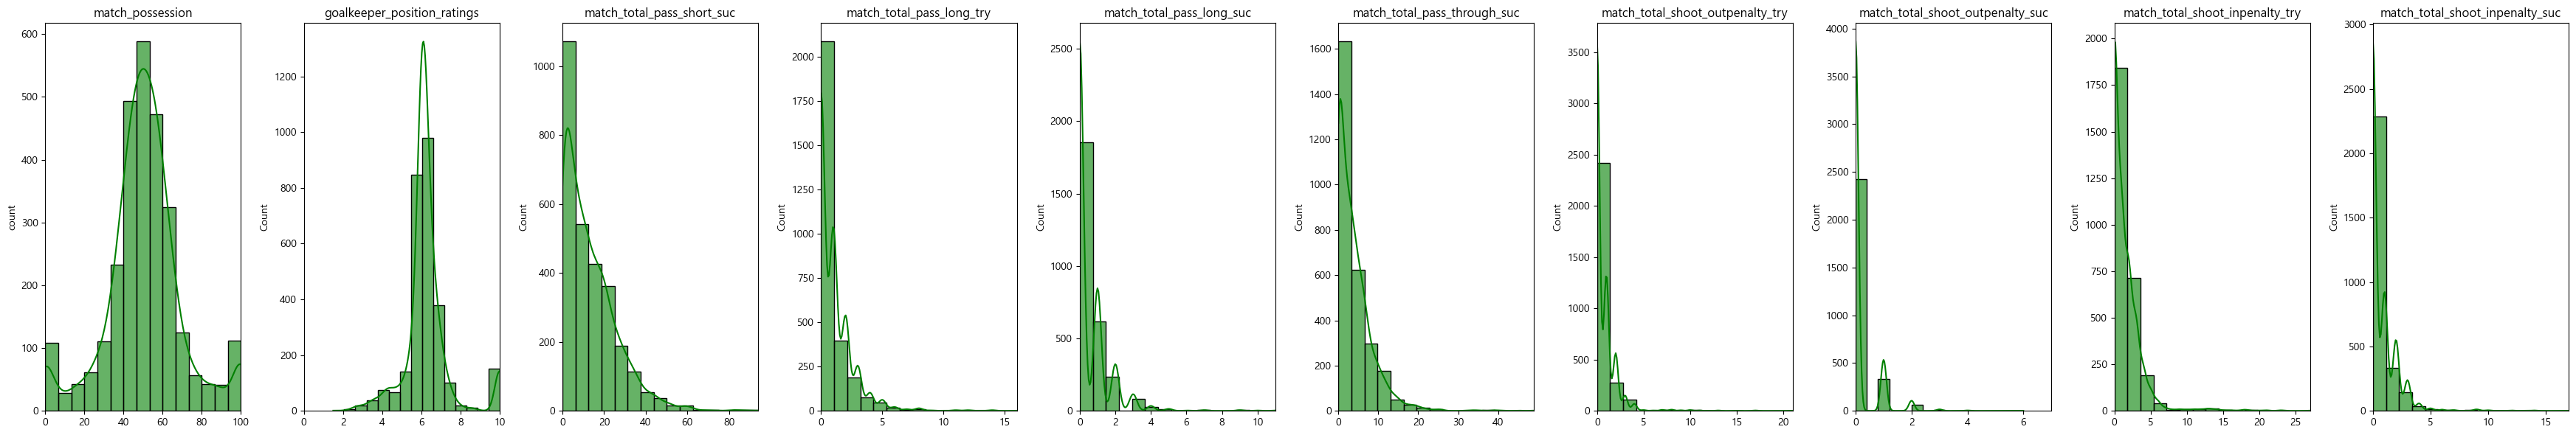

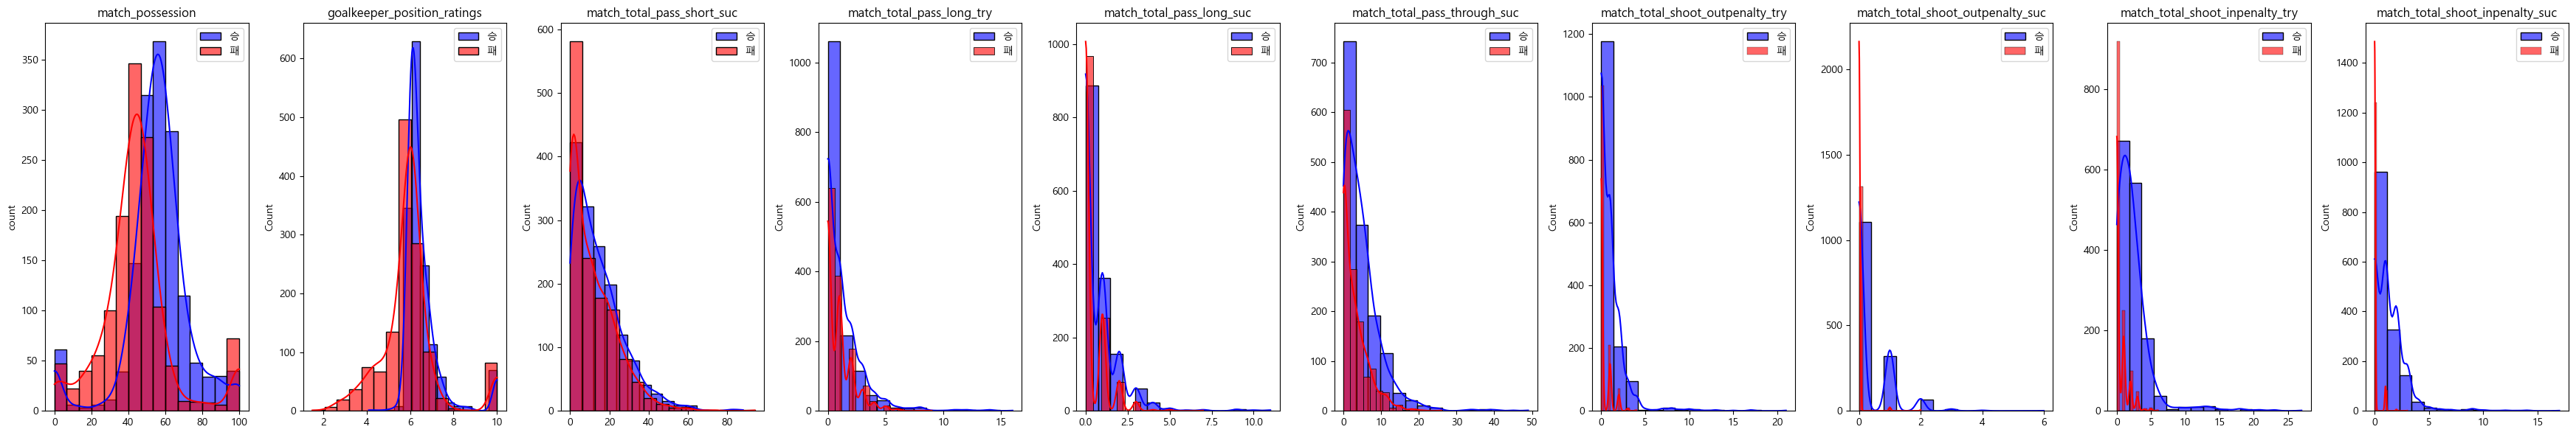

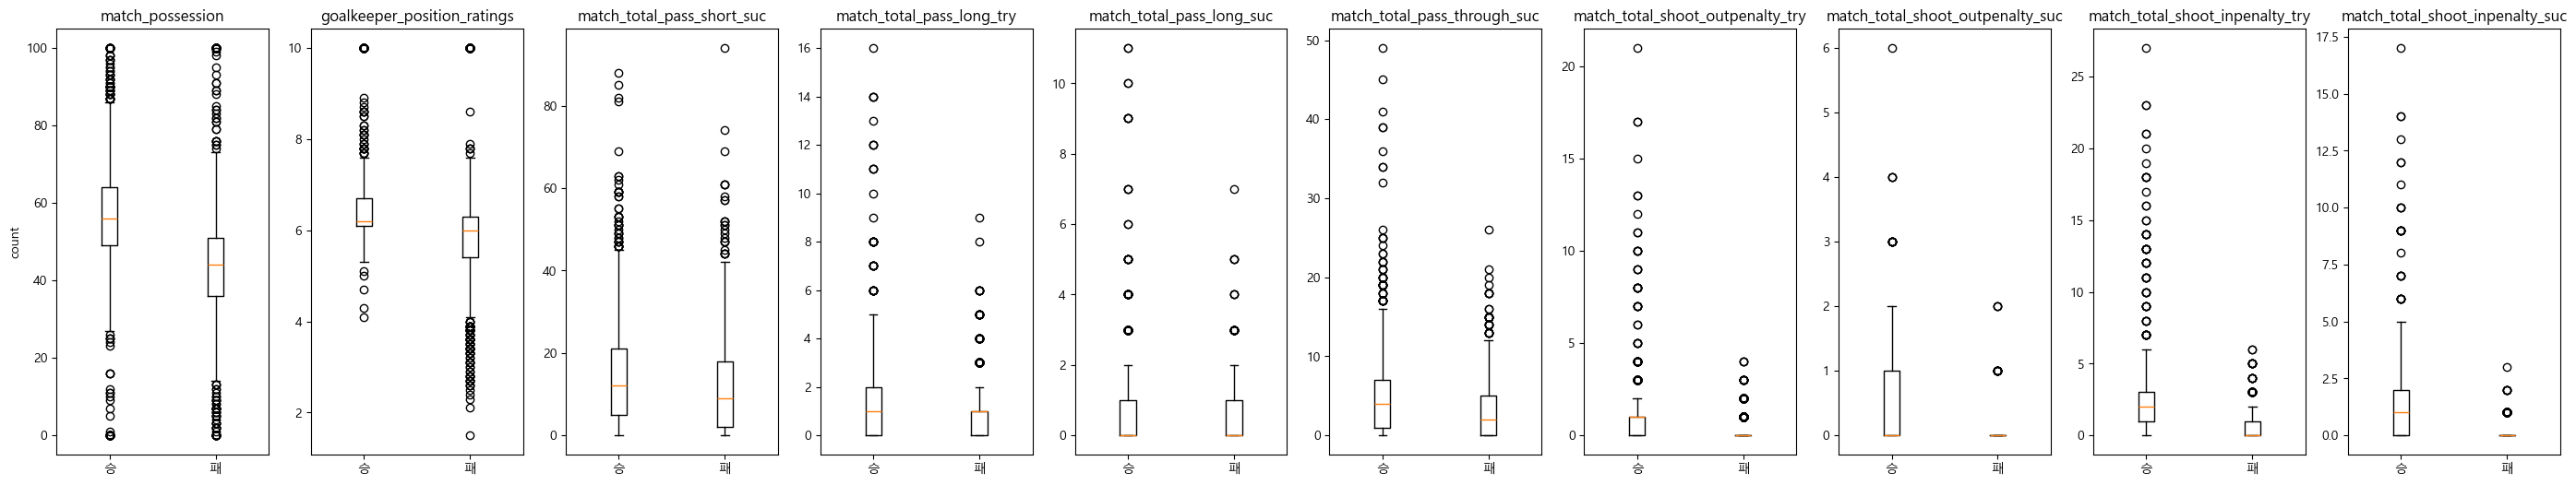

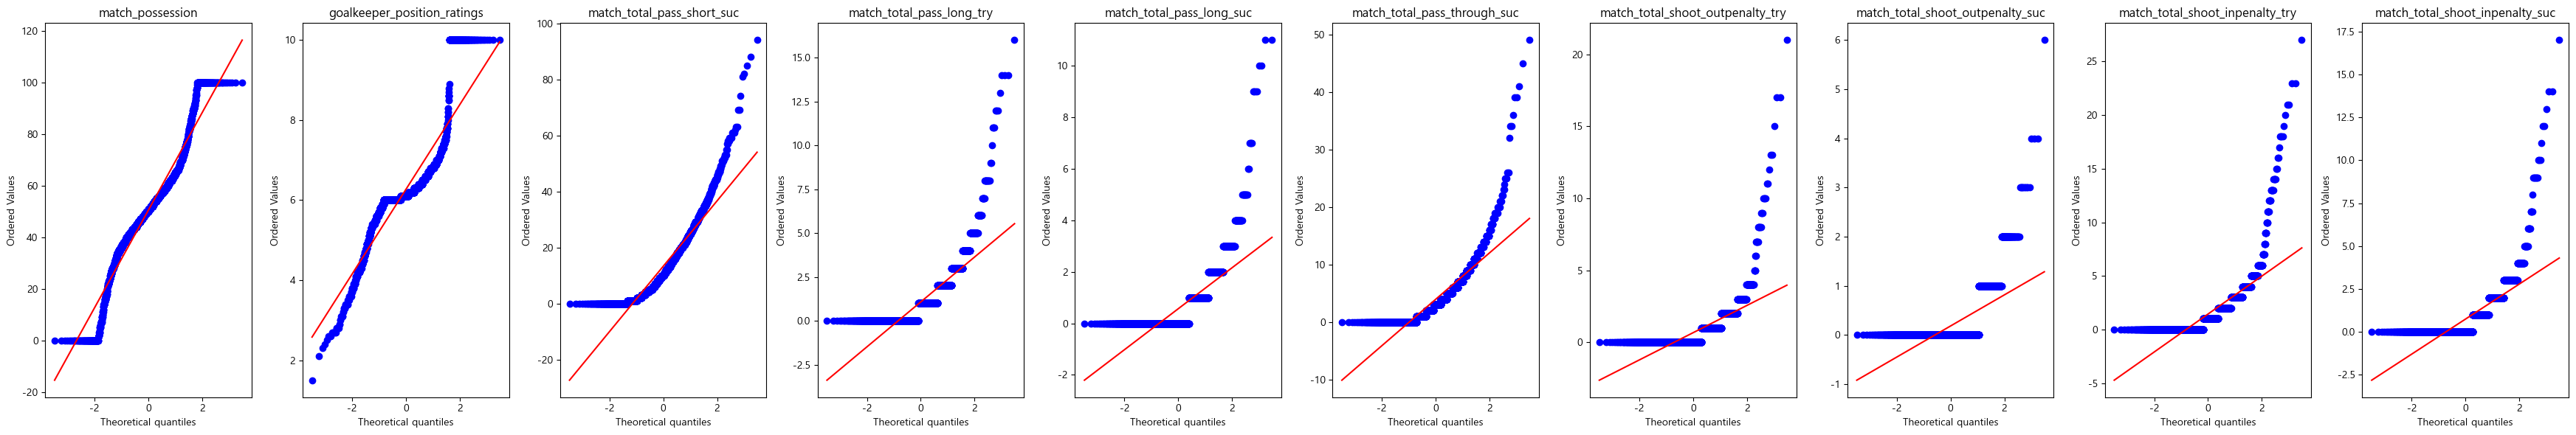

In [75]:
df4 = df1[['match_result'] + list(df2_temp.columns)]

df4_win = df4[df4['match_result'] == '승']
df4_lose = df4[df4['match_result'] == '패']

df4_temp = df4.drop(columns = ['match_result'])

col_hist_all(df4_temp, df4_temp.columns);
col_hist(df4_win, df4_lose, df4_temp.columns, False);
col_boxplot(df4_win, df4_lose, df4_temp.columns, False);
col_qqplot_all(df4_temp, df4_temp.columns);

In [59]:
normality_test(df4_win, df4_lose, df4_temp.columns)

match_possession 
 승: p-value=(5.935379116954402e-31, 1.3380833567564825e-21)                       
 패: p-value=(5.886394975938547e-29, 1.1478557473681182e-23)                       
 Levene’s test p-value=0.012549646040513018
goalkeeper_position_ratings 
 승: p-value=(1.5650874898757576e-48, 1.6688729092627415e-80)                       
 패: p-value=(4.1526424346161524e-34, 1.2567321770874771e-42)                       
 Levene’s test p-value=6.808029082920177e-21
match_total_pass_short_suc 
 승: p-value=(5.020918757136039e-32, 3.0337103923210168e-21)                       
 패: p-value=(7.14861225578693e-33, 9.085979883396704e-31)                       
 Levene’s test p-value=0.08365975290677732
match_total_pass_long_try 
 승: p-value=(4.513939010550249e-47, 2.366313807262465e-84)                       
 패: p-value=(8.091776968401912e-41, 3.852489778265176e-79)                       
 Levene’s test p-value=7.130538687454603e-09
match_total_pass_long_suc 
 승: p-value=(1.2772841405669707e

In [60]:
group_difference_test(df4_win, df4_lose, df4_temp.columns)

-----------------------------------------------------
match_possession은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
goalkeeper_position_ratings은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_short_suc은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_long_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_long_suc은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_pass_through_suc은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_outpenalty_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_outpenalty_suc은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
match_total_shoot_inpenalty_try은(는) 승패에 따라 유의미한 차이가 있음
-----------------------------------------------------
ma

In [61]:
df4

,match_result,match_possession,goalkeeper_position_ratings,match_total_pass_short_suc,match_total_pass_long_try,match_total_pass_long_suc,match_total_pass_through_suc,match_total_shoot_outpenalty_try,match_total_shoot_outpenalty_suc,match_total_shoot_inpenalty_try,match_total_shoot_inpenalty_suc
0,승,70,10.0,12,1,0,5,2,1,2,0
1,승,59,6.7,23,0,0,5,2,1,1,1
2,패,47,7.3,12,0,0,11,0,0,0,0
3,승,53,6.1,23,2,0,6,0,0,1,1
4,승,48,6.3,40,1,1,2,3,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...
2833,승,7,6.0,0,0,0,0,0,0,0,0
2834,패,10,5.5,1,0,0,0,0,0,0,0
2835,승,90,6.1,14,0,0,0,0,0,1,1
2836,승,0,6.0,0,0,0,0,0,0,0,0


---

# PRACTICE

In [62]:
# match_total_goal, match_possession, match_total_shoot_inpenalty_try, 
# match_total_pass_short_try, match_total_pass_long_try, match_total_pass_through_try
# match_total_shoot_outpenalty_try, match_total_shoot_inpenalty_try

column_name = 'match_total_shoot_inpenalty_try'

temp_query = f"SELECT match_result, {column_name} FROM match_user;"
df_temp = pd.read_sql(temp_query, con = engine);

df_temp[column_name] += 0.1
df_temp[f'{column_name}_boxcox'] = stats.boxcox(df_temp[column_name])[0] 

x = df_temp[column_name]
x_win = df_temp[df_temp['match_result'] == '승'][column_name]
x_lose = df_temp[df_temp['match_result'] == '패'][column_name]

y = df_temp[f'{column_name}_boxcox'] 
y_win = df_temp[df_temp['match_result'] == '승'][f'{column_name}_boxcox'] 
y_lose = df_temp[df_temp['match_result'] == '패'][f'{column_name}_boxcox'] 

2024-12-19 19:37:48,316 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %(table_schema)s AND table_name = %(table_name)s
2024-12-19 19:37:48,317 INFO sqlalchemy.engine.Engine [cached since 23.27s ago] {'table_schema': 'side_proj_fco', 'table_name': 'SELECT match_result, match_total_shoot_inpenalty_try FROM match_user;'}
2024-12-19 19:37:48,319 INFO sqlalchemy.engine.Engine SELECT match_result, match_total_shoot_inpenalty_try FROM match_user;
2024-12-19 19:37:48,320 INFO sqlalchemy.engine.Engine [raw sql] {}


In [63]:
print(shapiro(x))
print(kstest(x, 'norm', args=(x.mean(), x.std())))

if shapiro(x).pvalue > 0.05 :
    print(f'{column_name}은(는) 정규분포를 따른다고 볼 수 있음, _shap')
else:
    print(f'{column_name}은(는) 정규분포를 따르지 않음, _shap')

if kstest(x, 'norm', args=(x.mean(), x.std())).pvalue > 0.05 : 
    print(f'{column_name}은(는) 정규분포를 따른다고 볼 수 있음, _kosm')
else:
    print(f'{column_name}은(는) 정규분포를 따르지 않음, _kosm')

print('----------------------------------------------------------')
print(shapiro(x_win))
print(kstest(x_win, 'norm', args=(x_win.mean(), x_win.std())))

if shapiro(x_win).pvalue > 0.05 :
    print(f'{column_name}_win 은(는) 정규분포를 따른다고 볼 수 있음, _shap')
else:
    print(f'{column_name}_win 은(는) 정규분포를 따르지 않음, _shap')

if kstest(x_win, 'norm', args=(x_win.mean(), x_win.std())).pvalue > 0.05 : 
    print(f'{column_name}_win 은(는) 정규분포를 따른다고 볼 수 있음, _kosm')
else:
    print(f'{column_name}_win 은(는) 정규분포를 따르지 않음, _kosm')

print('----------------------------------------------------------')
print(shapiro(x_lose))
print(kstest(x_lose, 'norm', args=(x_lose.mean(), x_lose.std())))

if shapiro(x_lose).pvalue > 0.05 :
    print(f'{column_name}_lose 은(는) 정규분포를 따른다고 볼 수 있음, _shap')
else:
    print(f'{column_name}_lose 은(는) 정규분포를 따르지 않음, _shap')

if kstest(x_lose, 'norm', args=(x_lose.mean(), x_lose.std())).pvalue > 0.05 : 
    print(f'{column_name}_lose 은(는) 정규분포를 따른다고 볼 수 있음, _kosm')
else:
    print(f'{column_name}_lose 은(는) 정규분포를 따르지 않음, _kosm')

print('----------------------------------------------------------')
stat_win_shap, p_val_win_shap = shapiro(y_win)
stat_lose_shap, p_val_lose_shap = shapiro(y_lose)

stat_win_kosm, p_val_win_kosm = kstest(y_win, 'norm', args=(y_win.mean(), y_win.std()))
stat_lose_kosm, p_val_lose_kosm = kstest(y_lose, 'norm', args=(y_lose.mean(), y_lose.std()))

stat, p_val = levene(y_win, y_lose)

print(f'{column_name} \n 승: p-value={p_val_win_shap, p_val_win_kosm} \
                \n 패: p-value={p_val_lose_shap, p_val_lose_kosm} \
                \n Levene’s test p-value={p_val}')

if p_val_win_shap > 0.05 and p_val_lose_shap > 0.05:
    print(f'{column_name}은(는) 정규분포를 따른다고 볼 수 있음, _shap')
else:
    print(f'{column_name}은(는) 정규분포를 따르지 않음, _shap')

if p_val_win_kosm > 0.05 and p_val_lose_kosm > 0.05:
    print(f'{column_name}은(는) 정규분포를 따른다고 볼 수 있음, _kosm')
else:
    print(f'{column_name}은(는) 정규분포를 따르지 않음, _kosm')

if p_val > 0.05:
    print(f'{column_name}은(는) 등분산을 따른다고 볼 수 있음')
else:
    print(f'{column_name}은(는) 등분산을 따르지 않음')

if (p_val_win_shap > 0.05 and p_val_lose_shap > 0.05) or (p_val_win_kosm > 0.05 and p_val_lose_kosm > 0.05): 
    stat, p_val = ttest_ind(y_win, y_lose, equal_var=True)
    test_type = "t-test"
    
else:  
    stat, p_val = mannwhitneyu(y_win, y_lose)
    test_type = "Mann-Whitney U test"

if p_val < 0.05:
    print(f'{column_name}은(는) 승패에 따라 유의미한 차이가 있음')
else:
    print(f'{column_name}은(는) 승패에 따른 차이가 없음, XXXXXXXXXXXXXXXX')

ShapiroResult(statistic=0.6068821114896326, pvalue=1.6693034088821562e-62)
KstestResult(statistic=0.26226460879254326, pvalue=9.828532862056203e-173, statistic_location=0.1, statistic_sign=-1)
match_total_shoot_inpenalty_try은(는) 정규분포를 따르지 않음, _shap
match_total_shoot_inpenalty_try은(는) 정규분포를 따르지 않음, _kosm
----------------------------------------------------------
ShapiroResult(statistic=0.6597235089040101, pvalue=1.1865033090730458e-47)
KstestResult(statistic=0.21875897799363542, pvalue=8.344331102622533e-64, statistic_location=3.1, statistic_sign=1)
match_total_shoot_inpenalty_try_win 은(는) 정규분포를 따르지 않음, _shap
match_total_shoot_inpenalty_try_win 은(는) 정규분포를 따르지 않음, _kosm
----------------------------------------------------------
ShapiroResult(statistic=0.6095004387681483, pvalue=1.3331822278179532e-47)
KstestResult(statistic=0.3993146539382591, pvalue=5.1681671625538594e-192, statistic_location=0.1, statistic_sign=1)
match_total_shoot_inpenalty_try_lose 은(는) 정규분포를 따르지 않음, _shap
match_tota

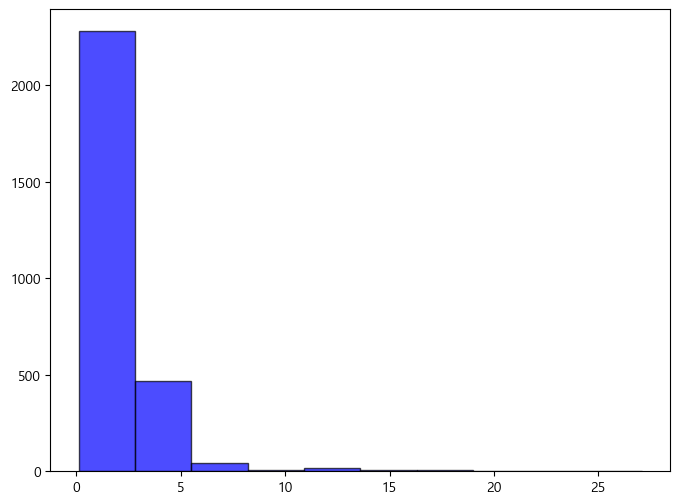

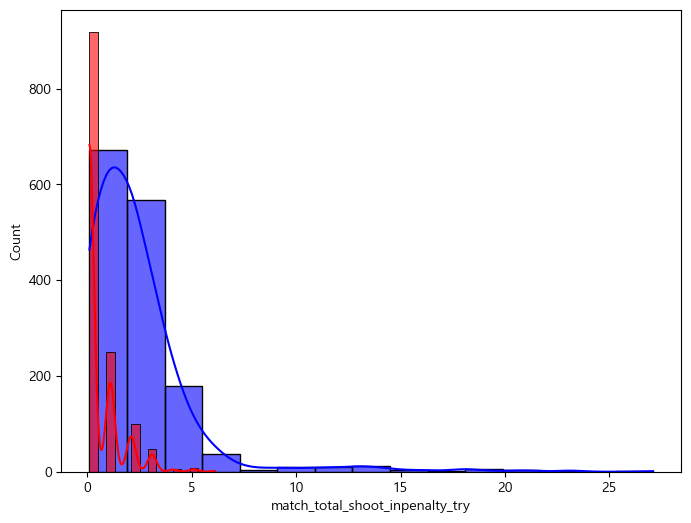

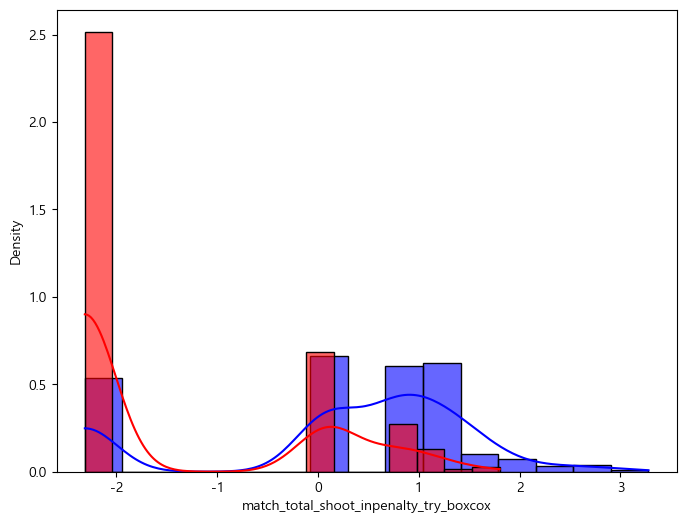

In [64]:
fig, ax = plt.subplots(figsize=(8, 6))  

ax.hist(x, color='blue', alpha=0.7, edgecolor='black')

fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(x_win, color='blue', bins = 15, kde=True, ax=ax, label='승', alpha=0.6);
sns.histplot(x_lose, color='red', bins = 15, kde=True, ax=ax, label='패', alpha=0.6);

fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(y_win, color='blue', bins = 15, kde=True, ax=ax, label='승', stat="density", alpha=0.6);
sns.histplot(y_lose, color='red', bins = 15, kde=True, ax=ax, label='패', stat="density", alpha=0.6);

---